# Plan

#### Pre-starting

How much time do I have?
- 6 blocks of time

What all do I need to complete?

1. Create a WBS
2. Assign time to each task/wbd

### Acquire

In [1]:
import env
import pandas as pd
import os

In [2]:
def get_telco_data():
    '''
    Argument: No arguments required
    Actions: 
        1. Checks for the existence of the telco csv in thw current directory
            a. if present:
                i. reads the csv
            b. if not present:
                i. queries MySQL dtabase using the env.py file for the credentials
                ii. saves the csv to the current working directory
    Return: telco churn dataframe
    Modules: pandas, os, env
    '''
    # a variable to hold the xpected or future file name
    filename = 'telco.csv'
    
    # if the file is present in the directory 
    if os.path.isfile(filename):
      
        # read the csv and assign it to the variable df
        df = pd.read_csv(filename)
        
        # return the dataframe and exit the funtion
        return df
    
    # if the file is not in the current working directory,
    else:
        # assign the name of the database to db
        db = 'telco_churn'
        
        # use the env.py function to get the url needed from the db
        url = env.get_db_url(db)
        
        # assign the sql query into the variable query
        query = '''SELECT *
            FROM customers c
            inner JOIN customer_contracts cc ON c.customer_id = cc.customer_id
            inner JOIN contract_types ct ON cc.contract_type_id = ct.contract_type_id
            inner JOIN internet_service_types ist ON c.internet_service_type_id = ist.internet_service_type_id
            inner JOIN customer_payments cp ON c.customer_id = cp.customer_id
            Inner JOIN payment_types pt ON cp.payment_type_id = pt.payment_type_id;'''
        
        # query sql using pandas function
        df = pd.read_sql(query, url, index_col='customer_id')
        
        # save the dataframe as a csv to the current working directory
        df.to_csv(filename)
        
        # returns the dataframe
        return df

In [3]:
df = get_telco_data()

### Clean

In [4]:
def clean_telco(df):
    '''
    Arguments: telco df 
    Actions:
        1. Assigns contents of duplicate columns to new columns with different names
        2. Drops unnecessary columns including duplicate columns and primary/foreign key columns
        3. Change data type of column from object to float
        4. Create a list of columns with object data types
        5. Create dummy variables for all object type data types
        6. Concatenates dummay variabels to original dataframe
    Returns: telco df prepared to be split
    '''
    # creating a list of duplicate columns ending with numbers which appears to be a signifier for a duplicate columns
    dupe_cols = df.columns[df.columns.str.endswith('1') | df.columns.str.endswith('2')].to_list()
    
    # dropping duplicates
    df = df.drop(columns=dupe_cols)
    
    # identifying the columns that end in '_id'
    id_cols_drop = [col for col in df if col[-3:] == '_id']
    
    # Drop unnecessary columns that have '_id'
    df = df.drop(columns=id_cols_drop)
    
    # Convert columns data type from object to float
    df['total_charges'] = (df['total_charges'] + '0').astype(float)
    
    return df

> ### Duplicates

In [5]:
# There are duplicate columns so we will check to make sure they have the same data first
df.columns.to_list()

['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'internet_service_type_id',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'contract_type_id',
 'paperless_billing',
 'payment_type_id',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type_id.1',
 'paperless_billing.1',
 'contract_type_id.2',
 'contract_type',
 'internet_service_type_id.1',
 'internet_service_type',
 'payment_type_id.1',
 'monthly_charges.1',
 'total_charges.1',
 'payment_type_id.2',
 'payment_type']

In [6]:
# creating a list of duplicate columns eAaronnding with numbers which appears to be a signifier for a duplicate columns
dupe_cols = df.columns[df.columns.str.endswith('1') | df.columns.str.endswith('2')].to_list()

In [7]:
# checking to see if the columns are duplicates
# (df['contract_type_id'] == df[dupe_cols[0]]).value_counts()
# (df['paperless_billing'] == df[dupe_cols[1]]).value_counts()
# (df['internet_service_type_id'] == df[dupe_cols[3]]).value_counts()
# (df['payment_type_id'] == df[dupe_cols[4]]).value_counts()
# (df['monthly_charges'] == df[dupe_cols[5]]).value_counts()
# (df['total_charges'] == df[dupe_cols[6]]).value_counts()

# all of the columns are duplicates, will now drop all the columns with duplicates from the df

dupe_cols

['contract_type_id.1',
 'paperless_billing.1',
 'contract_type_id.2',
 'internet_service_type_id.1',
 'payment_type_id.1',
 'monthly_charges.1',
 'total_charges.1',
 'payment_type_id.2']

In [8]:
# dropping all the duplicate columns
df = df.drop(columns=dupe_cols)

> ### Data types

In [9]:
# no null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [10]:
# Total charges should be a float or int

In [11]:
df['total_charges'] = (df['total_charges'] + '0').astype(float)

In [12]:
# Getting all the value. counts for the obkect to see if there is are any questionalbe entries in the dataset
object_value_counts = {}
for col in df:
    if df[col].dtype == 'O':
        object_value_counts[col] = [df[col].value_counts()]

In [13]:
object_value_counts

{'customer_id': [('0004-TLHLJ', '0004-TLHLJ', '0004-TLHLJ')    1
  ('7943-RQCHR', '7943-RQCHR', '7943-RQCHR')    1
  ('9659-ZTWSM', '9659-ZTWSM', '9659-ZTWSM')    1
  ('9588-OZDMQ', '9588-OZDMQ', '9588-OZDMQ')    1
  ('9489-JMTTN', '9489-JMTTN', '9489-JMTTN')    1
                                               ..
  ('9490-DFPMD', '9490-DFPMD', '9490-DFPMD')    1
  ('9101-BWFSS', '9101-BWFSS', '9101-BWFSS')    1
  ('8823-RLPWL', '8823-RLPWL', '8823-RLPWL')    1
  ('8118-LSUEL', '8118-LSUEL', '8118-LSUEL')    1
  ('9809-IMGCQ', '9809-IMGCQ', '9809-IMGCQ')    1
  Name: customer_id, Length: 7043, dtype: int64],
 'gender': [Male      3555
  Female    3488
  Name: gender, dtype: int64],
 'partner': [No     3641
  Yes    3402
  Name: partner, dtype: int64],
 'dependents': [No     4933
  Yes    2110
  Name: dependents, dtype: int64],
 'phone_service': [Yes    6361
  No      682
  Name: phone_service, dtype: int64],
 'multiple_lines': [No                  3390
  Yes                 2971
  No ph

In [14]:
# Getting all the value. counts for the obkect to see if there is are any questionalbe entries in the dataset
num_value_counts = {}
for col in df:Aaron Moore
    if df[col].dtype != 'O':
        num_value_counts[col] = [df[col].value_counts()]

In [15]:
num_value_counts

{'senior_citizen': [0    5901
  1    1142
  Name: senior_citizen, dtype: int64],
 'tenure': [1     613
  72    362
  2     238
  3     200
  4     176
       ... 
  28     57
  39     56
  44     51
  36     50
  0      11
  Name: tenure, Length: 73, dtype: int64],
 'internet_service_type_id': [2    3096
  1    2421
  3    1526
  Name: internet_service_type_id, dtype: int64],
 'contract_type_id': [1    3875
  3    1695
  2    1473
  Name: contract_type_id, dtype: int64],
 'payment_type_id': [1    2365
  2    1612
  3    1544
  4    1522
  Name: payment_type_id, dtype: int64],
 'monthly_charges': [20.05     61
  19.85     45
  19.95     44
  19.90     44
  19.70     43
            ..
  97.90      1
  118.35     1
  23.05      1
  91.45      1
  96.70      1
  Name: monthly_charges, Length: 1585, dtype: int64],
 'total_charges': [20.20      11
  0.00       11
  19.75       9
  19.65       8
  20.05       8
             ..
  1525.35     1
  6306.50     1
  300.80      1
  2301.15     1
  

> ### Takeaways
>- We might want to create a single columns titled 'add-ons' to represent the varuiety of add-ons available
>- we will have to do this after the explore phase of the project
>- I may be able to segmnt the customer based on where they lie on the major services provided by telco
    - Examples: Phone Service Users, Internet service user, neither

>- Encoding potential:
    - payment_type: can be encoded, drop 1st
    - internet service: encode drop first
    - contract type encode drop first
    - churn: Target variable so keep the same
    - Internet-based addons: online security, online_backup, device_protection, tech_support, 'streaming_tv,  streaming_movies
        - In the future may possibly want to come back and explore these more. All of these add ons require internet so this may be of import for us

In [16]:
for col in df:
    if 'type' in col and col[-3:] == '_id':
        print(col, df[col].value_counts())
    elif 'type' in col and col[-3:] != '_id':
        print(col, df[col].value_counts())
#     print(col == col[:-3])
#     print(col[-3:] == '_id')

internet_service_type_id 2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64
contract_type_id 1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64
payment_type_id 1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64
contract_type Month-to-month    3875
Two year          1695
One year          1473
Name: contract_type, dtype: int64
internet_service_type Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64
payment_type Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_type, dtype: int64


>### Takeaways:
>- Internet service type:
    - Fiber optic == 2
    - DSL == 1
    - No internet == 0
>- Contract type:
    - month to month == 1
    - 2 year == 3
    - 1 year == 2
>- Payment type
    - Electronic check == 1
    - Mailed check == 2
    - Bank transfer ==3
    - Credit Card == 4
    
> Encodeing:
    - For the encoding, i think I want to use the more descriptive columns and drop the columns that use the id's
    

In [17]:
# creating a list of unneccsary columns as decided by the view before
id_cols_drop = [col for col in df if col[-3:] == '_id']

In [18]:
# Dropping all unneccsary columns before encoding
df = df.drop(columns=id_cols_drop)

In [19]:
df_objects = [col for col in df if df[col].dtype == 'O' and col != 'churn']

In [20]:
pd.get_dummies(df[df_objects], drop_first=True)

,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,...,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
4,1,1,0,1,0,1,0,0,0,1,...,0,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,1,0,1,0,0,0,0,...,0,1,1,0,0,1,0,0,1,0
7039,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7040,0,1,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
7041,1,1,1,1,0,1,0,1,0,0,...,0,1,0,0,1,1,0,0,0,0


In [21]:
df = pd.concat([df, pd.get_dummies(df[df_objects], drop_first=True)], axis=1)

In [22]:
df.columns = df.columns.str.lower().str.strip().str.replace(' ','_').str.replace('(','').str.replace(')','')

/var/folders/fj/7fbysvvn7956npcj9d4mxfxw0000gn/T/ipykernel_57415/2018354207.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.lower().str.strip().str.replace(' ','_').str.replace('(','').str.replace(')','')
/var/folders/fj/7fbysvvn7956npcj9d4mxfxw0000gn/T/ipykernel_57415/2018354207.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.lower().str.strip().str.replace(' ','_').str.replace('(','').str.replace(')','')


In [23]:
df['churn']

0       Yes
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: churn, Length: 7043, dtype: object

In [24]:
Aaron Moorefrom prepare import split_data

### Split Data

In [25]:
num_cols = [col for col in df if df[col].dtype != 'O' or col == 'churn']        

In [26]:
df[num_cols]

,senior_citizen,tenure,monthly_charges,total_charges,churn,gender_male,partner_yes,dependents_yes,phone_service_yes,multiple_lines_no_phone_service,...,streaming_movies_no_internet_service,streaming_movies_yes,paperless_billing_yes,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_automatic,payment_type_electronic_check,payment_type_mailed_check
0,0,4,73.90,280.85,Yes,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1,0,54,45.20,2460.55,No,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,0,56,45.05,2560.10,No,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,29,45.00,1242.45,No,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0,72,85.15,6316.20,No,1,1,0,1,0,...,0,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,85.00,850.00,Yes,0,0,0,1,0,...,0,1,1,0,0,1,0,0,1,0
7039,0,4,50.40,206.60,Yes,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7040,0,13,54.15,701.05,No,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
7041,0,64,93.40,5822.30,No,1,1,1,1,0,...,0,1,0,0,1,1,0,0,0,0


### Prep

In [27]:
def prep_telco(df):
    '''
    Arguments: cleaned telco df
    Actions:
        1. Creates a dataframe with only dummy variables, numerical variables, and the target
        2. Formats all the column titles for python usability
        3. Splits data into train validate, and test with straitification on churn
    Return: train, validate, test
    '''
    # Create list of object type/categorical columns
    df_objects = [col for col in df if df[col].dtype == 'O' and col != 'churn']

    # Create dummy variables and add them to the df
    df = pd.concat([df, pd.get_dummies(df[df_objects], drop_first=True)], axis=1)
    
    # Create a list of all non-object variables and including the target churn
    num_cols = [col for col in df if df[col].dtype != 'O' or col == 'churn']
    
    # creating a df with only the variables needed for exploring and modeling
#     df = df[num_cols]
    
    # editing the churn series to reflect 1,0 for yes and no
    df.churn.replace(['Yes', 'No'], [1, 0], inplace=True)
    
    # change the titles of the encoded variables to be python friendly
    df.columns = df.columns.str.lower().str.strip().str.replace(' ','_').str.replace('(','').str.replace(')','')
    
    # splits the df into train, validate, and test with a stratification on the target
    train, validate, test = split_data(df, target='churn')
    
    return train, validate, test

In [28]:
# df.replace(['Yes', 'No'], [1, 0])

In [29]:
train, validate, test = prep_telco(clean_telco(get_telco_data()))

/var/folders/fj/7fbysvvn7956npcj9d4mxfxw0000gn/T/ipykernel_57415/2961115563.py:26: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.lower().str.strip().str.replace(' ','_').str.replace('(','').str.replace(')','')
/var/folders/fj/7fbysvvn7956npcj9d4mxfxw0000gn/T/ipykernel_57415/2961115563.py:26: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.lower().str.strip().str.replace(' ','_').str.replace('(','').str.replace(')','')


### Explore

>#### univariate stats and visuals

I think the dummy variables would be more useful to create before the modeling and not before the exploration.

1. split the data, and format the columns, 
2. then do stats explorations
3. pre-processing that creates the dummy variables, removes the objects type variables
4. Maybe more exploration with 
5. preprocess again with super confirmed variables
6. model

In [30]:
# creating a function to sepearate categorical variables and numerical variables
def determine_variable_type(train):
    '''
    Arguments: a train dataset
    Actions:
        1. Assigns columns names to categorical columns list or numerical columns list
            a. Categorical columns: the datatype is object or there are less than 10 unique values 
            b. Numerical columns: the datatype is not an object and thhere are 10 or more unique values
    Returns: explore_columns_list, categorical_column_list, numerical_column_list
    Modules: pandas
    
    '''
    # list comprehension that determines a col is  categorical if the data type is an object or there are less than 10 values
    cat_col = [col for col in train if train[col].dtype == 'O' or train[col].nunique() < 10]
    
    # list comprehension that complements the above
    num_col = [col for col in train if train[col].dtype != 'O' and train[col].nunique() >= 10]
    
    # full list of variables to explore
    explore_col = cat_col + num_col
    
    return explore_col, cat_col, num_col

In [31]:
def univariate_stats(train):
    '''
    Parameters: *only* a train dataset as an argument
    Actions:
        1. Creates univariate datavisuals for all variables in the dataset
        2. Displays summary statistics for variables with more than 5 unique values
    Returns: prints summary stats and graphs to understand the data
    Modules: searborn, matplotlib.pyplot, 
    '''
    explore_col, cat_col, num_col = determine_variable_type(train)
    
    for col in explore_col:
        if col in cat_col:
            sns.countplot(data=train, x=col,)
            plt.title(f'Barplot of {col.capitalize()}')
            plt.show()
            print(f'Value Frequency of {col.capitalize()}')
            print(pd.concat([train[col].value_counts(),
            train[col].value_counts(normalize=True)],
                 axis=1))
            print('\n\n------------------------------------------------------------------------------------------\n------------------------------------------------------------------------------------------\n\n')
        elif col in num_col:
            plt.subplot(121)
            plt.hist(train[col])
            plt.title(f'Histogram of {col.capitalize()}')
            
            plt.subplot(122)
            sns.boxplot(data=train, x=col)
            plt.title(f'Boxplot of {col.capitalize()}')
            plt.show()
            
            print(f'Summary statistics of {col.capitalize()}:\n')
            print(train[col].describe())
            print('\n\n------------------------------------------------------------------------------------------\n------------------------------------------------------------------------------------------\n\n')
    return

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

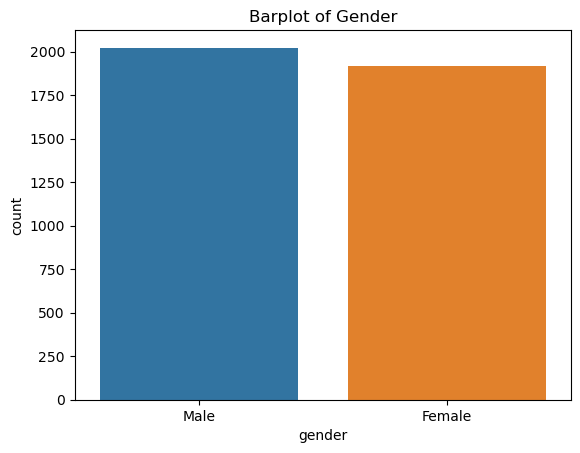

Value Frequency of Gender
        gender    gender
Male      2023  0.513061
Female    1920  0.486939


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




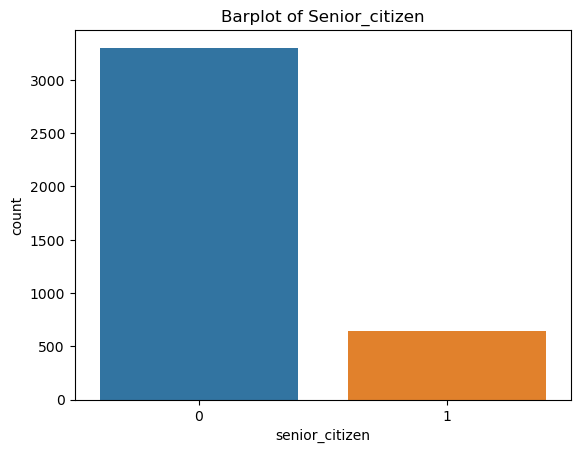

Value Frequency of Senior_citizen
   senior_citizen  senior_citizen
0            3302        0.837433
1             641        0.162567


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




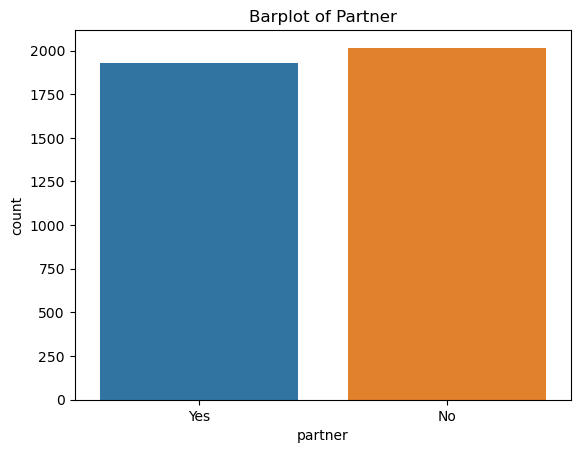

Value Frequency of Partner
     partner   partner
No      2016  0.511286
Yes     1927  0.488714


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




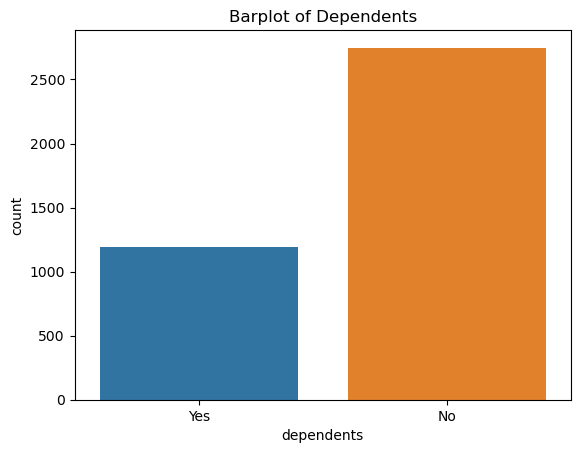

Value Frequency of Dependents
     dependents  dependents
No         2748    0.696931
Yes        1195    0.303069


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




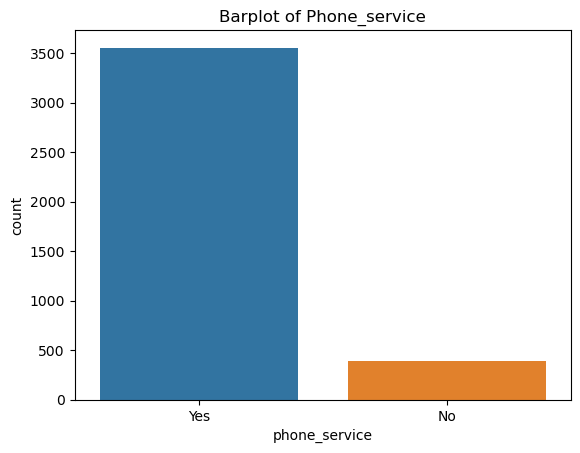

Value Frequency of Phone_service
     phone_service  phone_service
Yes           3556       0.901851
No             387       0.098149


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




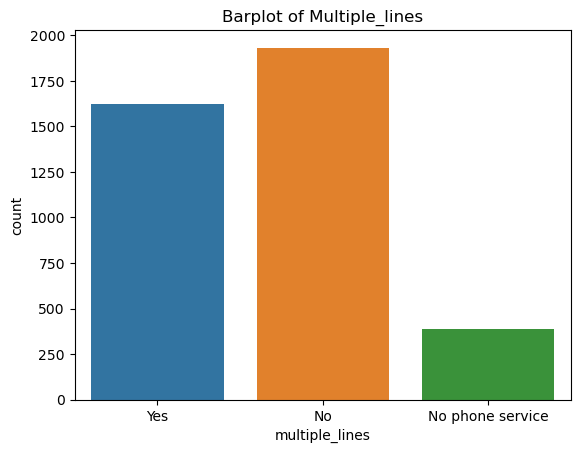

Value Frequency of Multiple_lines
                  multiple_lines  multiple_lines
No                          1933        0.490236
Yes                         1623        0.411616
No phone service             387        0.098149


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




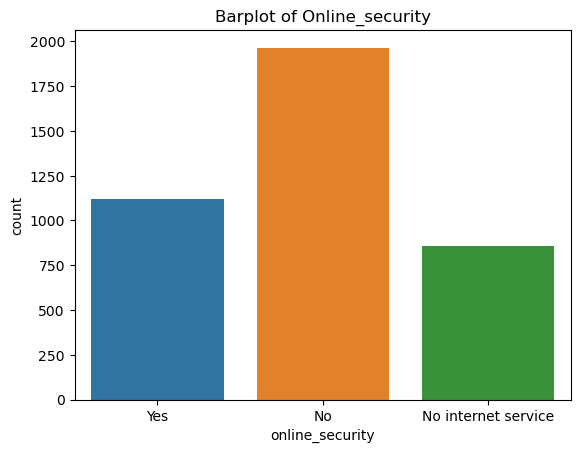

Value Frequency of Online_security
                     online_security  online_security
No                              1965         0.498352
Yes                             1119         0.283794
No internet service              859         0.217854


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




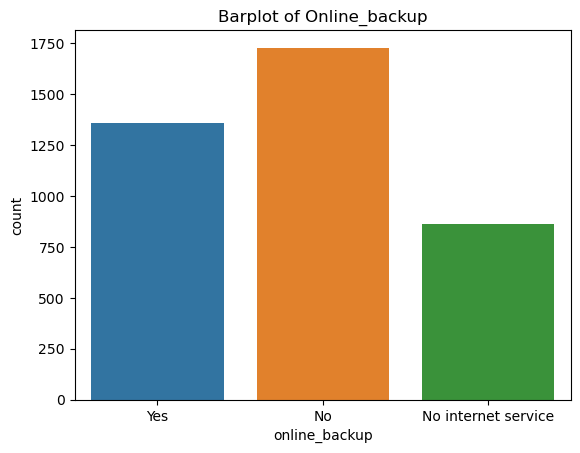

Value Frequency of Online_backup
                     online_backup  online_backup
No                            1727       0.437991
Yes                           1357       0.344154
No internet service            859       0.217854


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




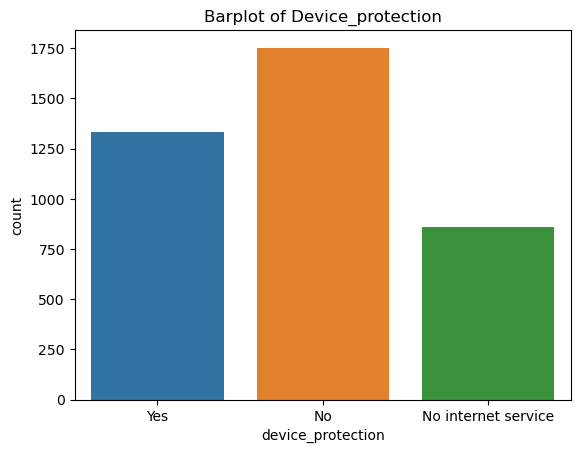

Value Frequency of Device_protection
                     device_protection  device_protection
No                                1753           0.444585
Yes                               1331           0.337560
No internet service                859           0.217854


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




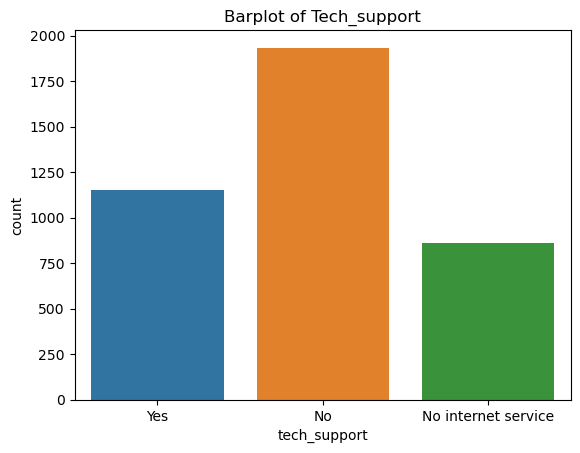

Value Frequency of Tech_support
                     tech_support  tech_support
No                           1934      0.490489
Yes                          1150      0.291656
No internet service           859      0.217854


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




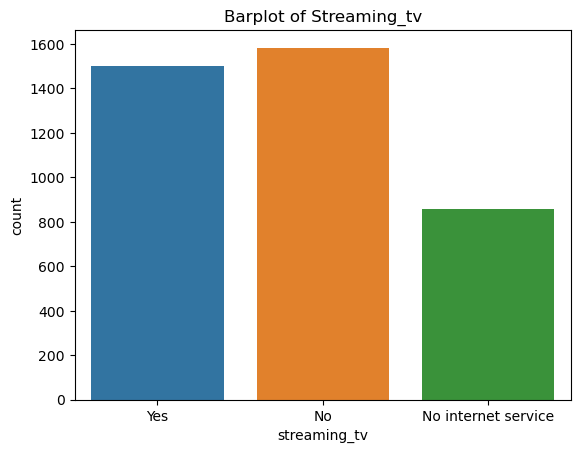

Value Frequency of Streaming_tv
                     streaming_tv  streaming_tv
No                           1584      0.401725
Yes                          1500      0.380421
No internet service           859      0.217854


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




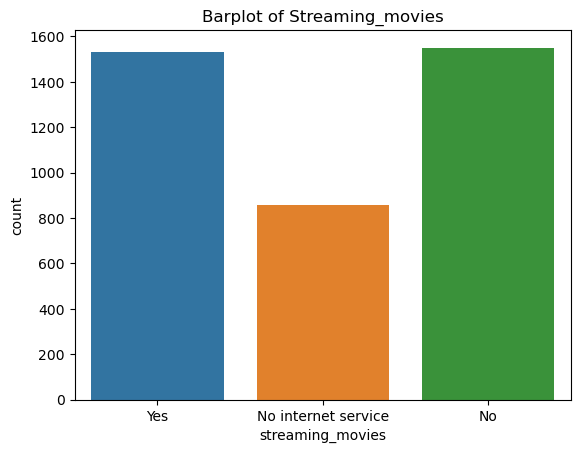

Value Frequency of Streaming_movies
                     streaming_movies  streaming_movies
No                               1551          0.393355
Yes                              1533          0.388790
No internet service               859          0.217854


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




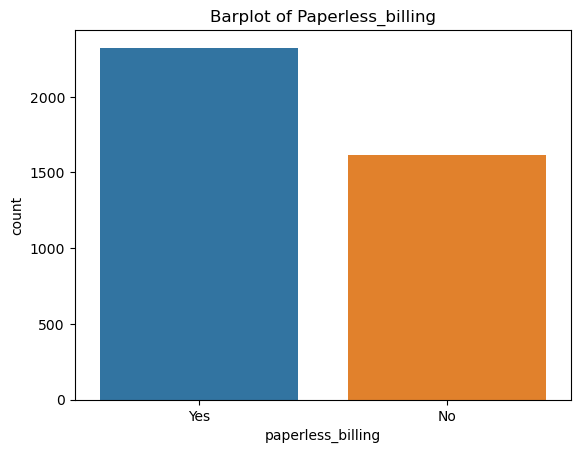

Value Frequency of Paperless_billing
     paperless_billing  paperless_billing
Yes               2325           0.589653
No                1618           0.410347


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




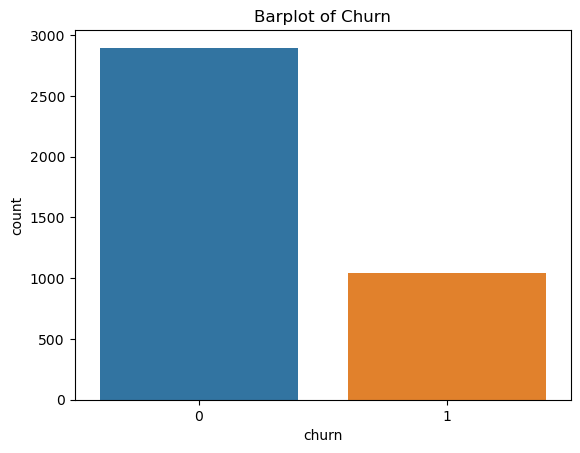

Value Frequency of Churn
   churn    churn
0   2897  0.73472
1   1046  0.26528


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




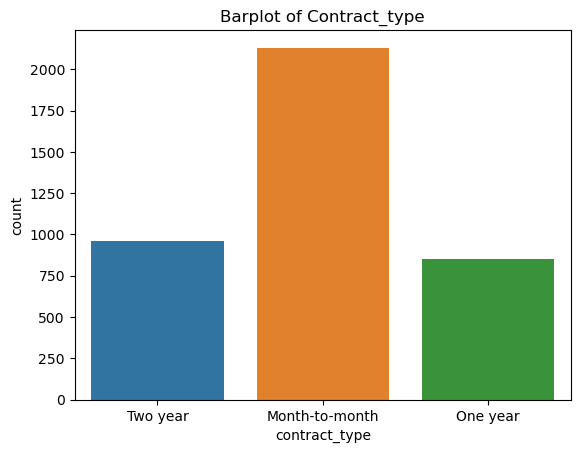

Value Frequency of Contract_type
                contract_type  contract_type
Month-to-month           2130       0.540198
Two year                  962       0.243977
One year                  851       0.215826


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




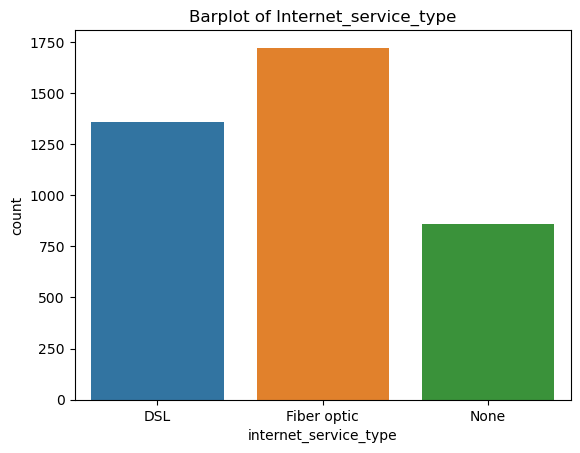

Value Frequency of Internet_service_type
             internet_service_type  internet_service_type
Fiber optic                   1723               0.436977
DSL                           1361               0.345169
None                           859               0.217854


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




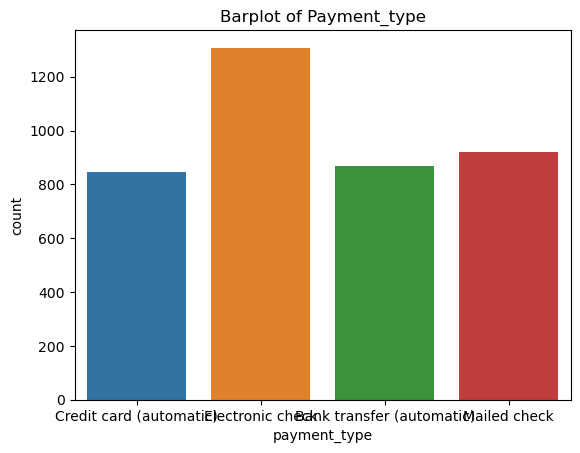

Value Frequency of Payment_type
                           payment_type  payment_type
Electronic check                   1308      0.331727
Mailed check                        922      0.233832
Bank transfer (automatic)           868      0.220137
Credit card (automatic)             845      0.214304


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




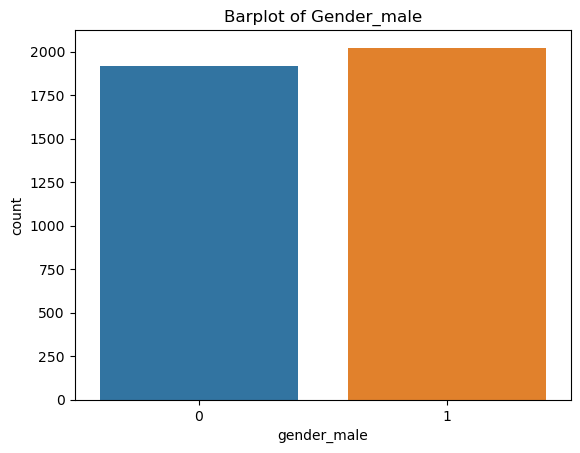

Value Frequency of Gender_male
   gender_male  gender_male
1         2023     0.513061
0         1920     0.486939


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




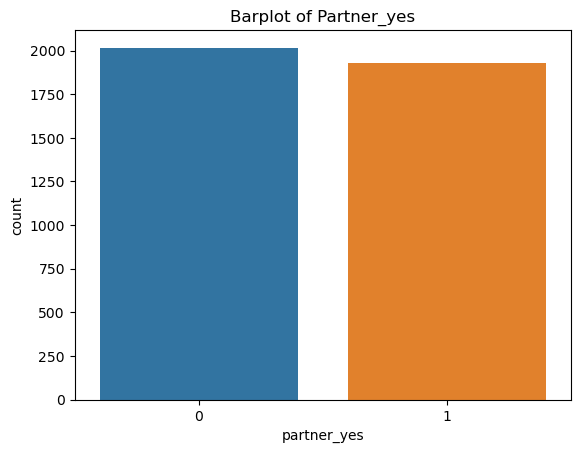

Value Frequency of Partner_yes
   partner_yes  partner_yes
0         2016     0.511286
1         1927     0.488714


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




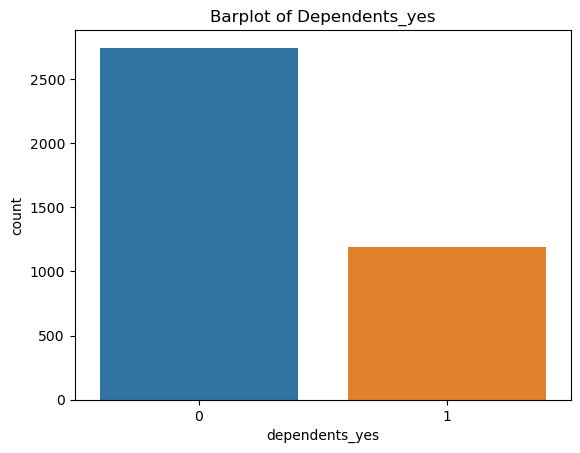

Value Frequency of Dependents_yes
   dependents_yes  dependents_yes
0            2748        0.696931
1            1195        0.303069


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




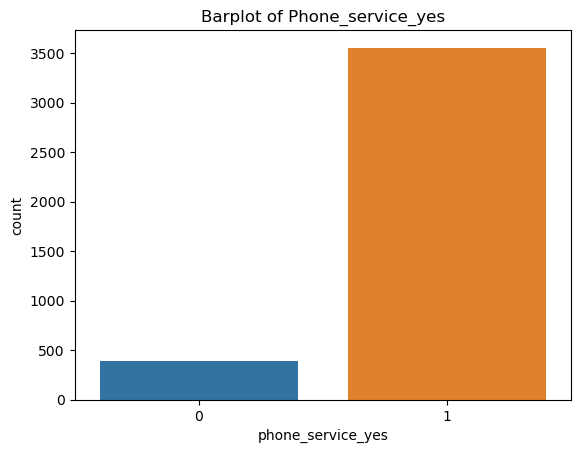

Value Frequency of Phone_service_yes
   phone_service_yes  phone_service_yes
1               3556           0.901851
0                387           0.098149


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




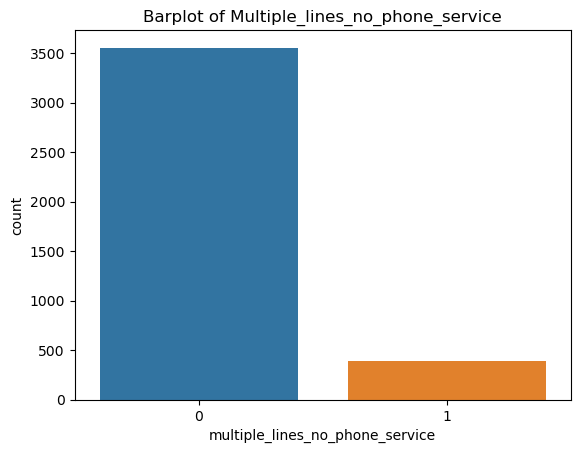

Value Frequency of Multiple_lines_no_phone_service
   multiple_lines_no_phone_service  multiple_lines_no_phone_service
0                             3556                         0.901851
1                              387                         0.098149


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




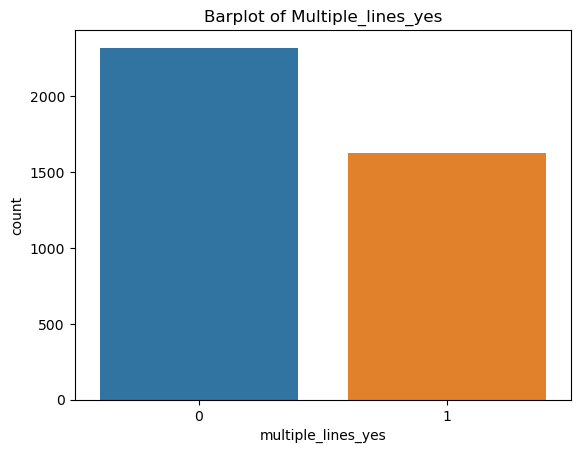

Value Frequency of Multiple_lines_yes
   multiple_lines_yes  multiple_lines_yes
0                2320            0.588384
1                1623            0.411616


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




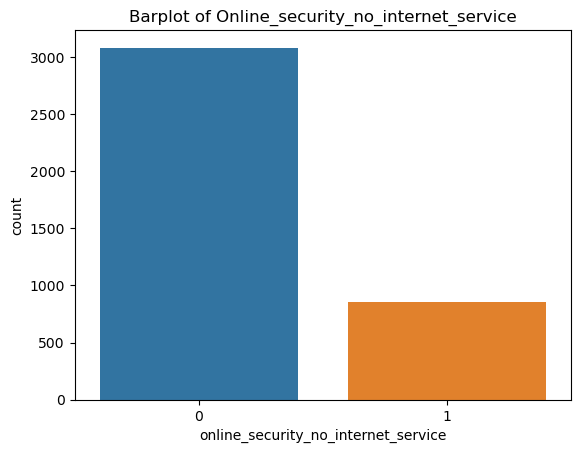

Value Frequency of Online_security_no_internet_service
   online_security_no_internet_service  online_security_no_internet_service
0                                 3084                             0.782146
1                                  859                             0.217854


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




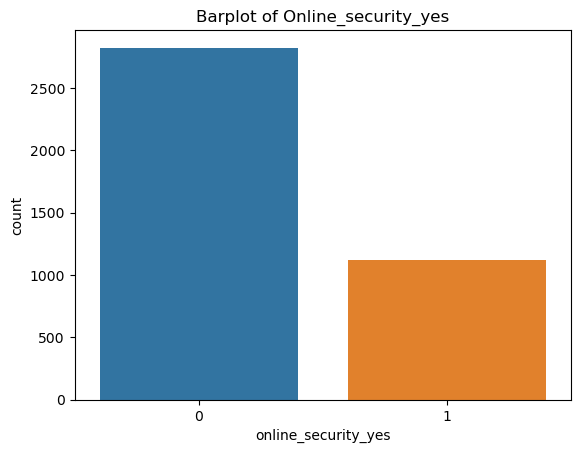

Value Frequency of Online_security_yes
   online_security_yes  online_security_yes
0                 2824             0.716206
1                 1119             0.283794


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




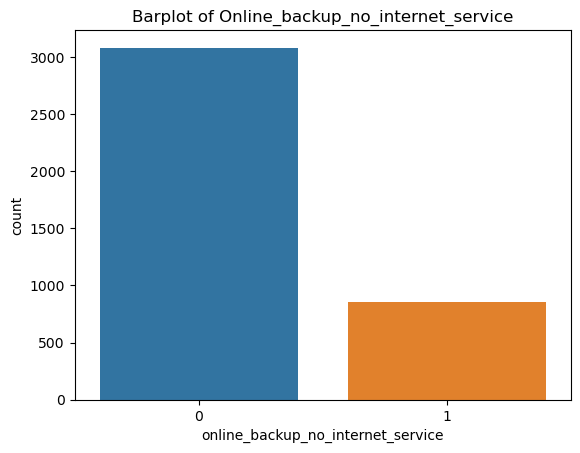

Value Frequency of Online_backup_no_internet_service
   online_backup_no_internet_service  online_backup_no_internet_service
0                               3084                           0.782146
1                                859                           0.217854


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




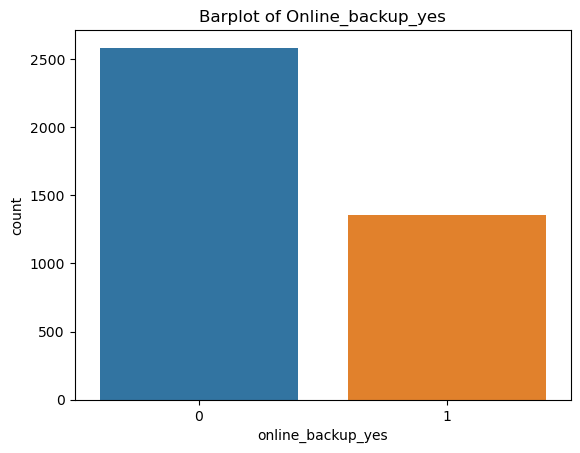

Value Frequency of Online_backup_yes
   online_backup_yes  online_backup_yes
0               2586           0.655846
1               1357           0.344154


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




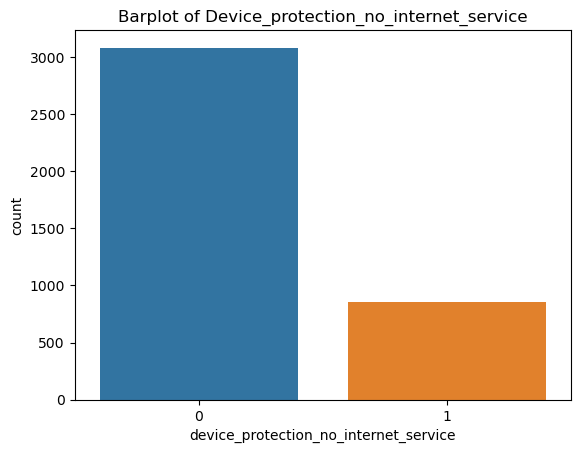

Value Frequency of Device_protection_no_internet_service
   device_protection_no_internet_service  \
0                                   3084   
1                                    859   

   device_protection_no_internet_service  
0                               0.782146  
1                               0.217854  


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




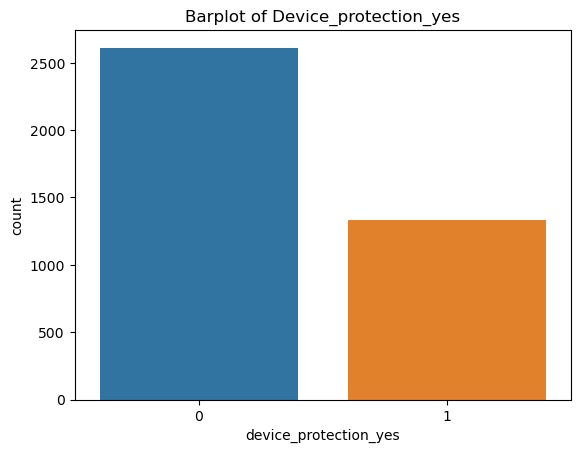

Value Frequency of Device_protection_yes
   device_protection_yes  device_protection_yes
0                   2612                0.66244
1                   1331                0.33756


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




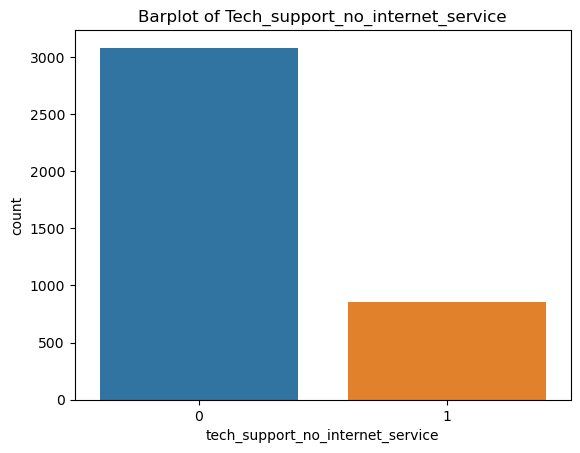

Value Frequency of Tech_support_no_internet_service
   tech_support_no_internet_service  tech_support_no_internet_service
0                              3084                          0.782146
1                               859                          0.217854


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




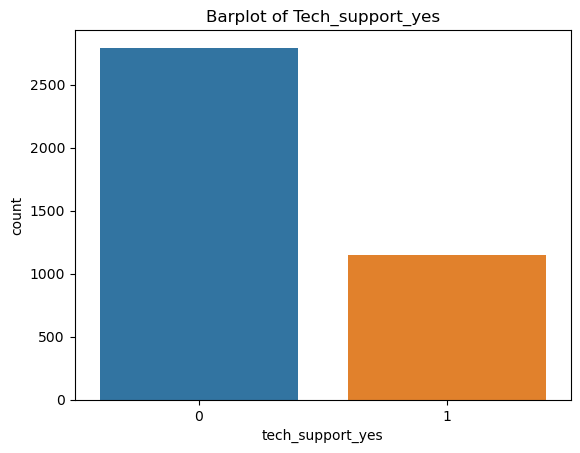

Value Frequency of Tech_support_yes
   tech_support_yes  tech_support_yes
0              2793          0.708344
1              1150          0.291656


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




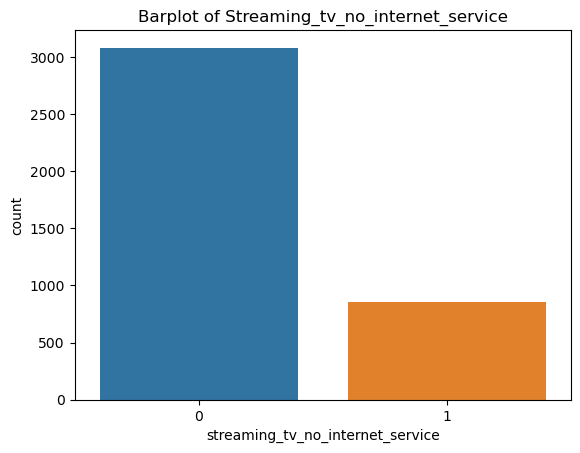

Value Frequency of Streaming_tv_no_internet_service
   streaming_tv_no_internet_service  streaming_tv_no_internet_service
0                              3084                          0.782146
1                               859                          0.217854


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




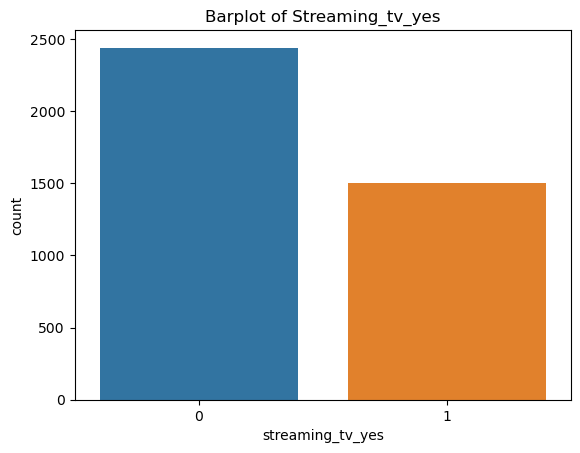

Value Frequency of Streaming_tv_yes
   streaming_tv_yes  streaming_tv_yes
0              2443          0.619579
1              1500          0.380421


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




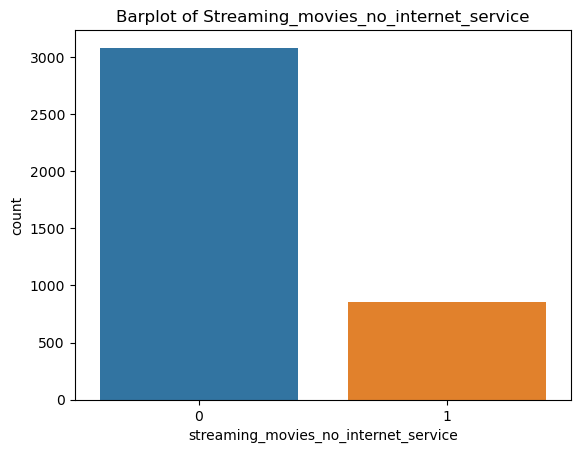

Value Frequency of Streaming_movies_no_internet_service
   streaming_movies_no_internet_service  streaming_movies_no_internet_service
0                                  3084                              0.782146
1                                   859                              0.217854


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




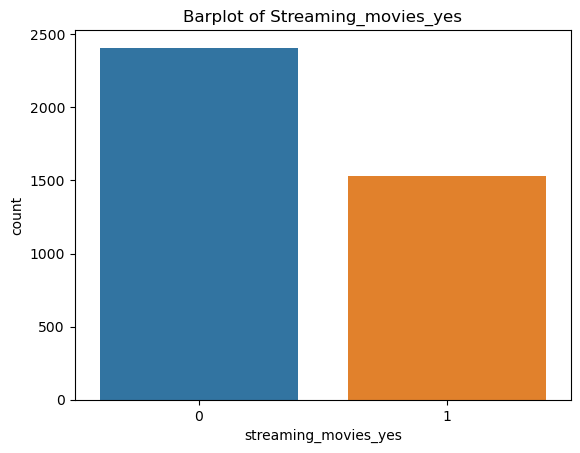

Value Frequency of Streaming_movies_yes
   streaming_movies_yes  streaming_movies_yes
0                  2410               0.61121
1                  1533               0.38879


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




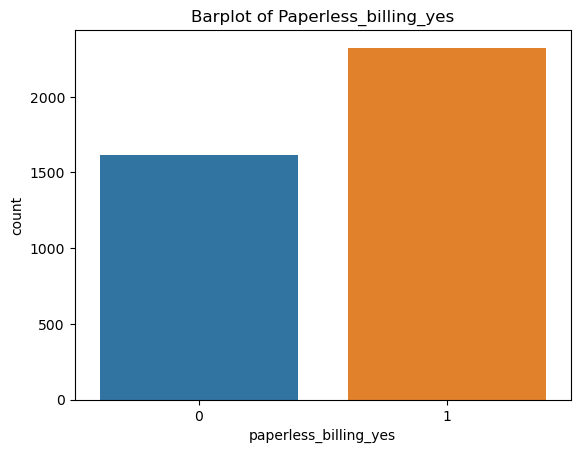

Value Frequency of Paperless_billing_yes
   paperless_billing_yes  paperless_billing_yes
1                   2325               0.589653
0                   1618               0.410347


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




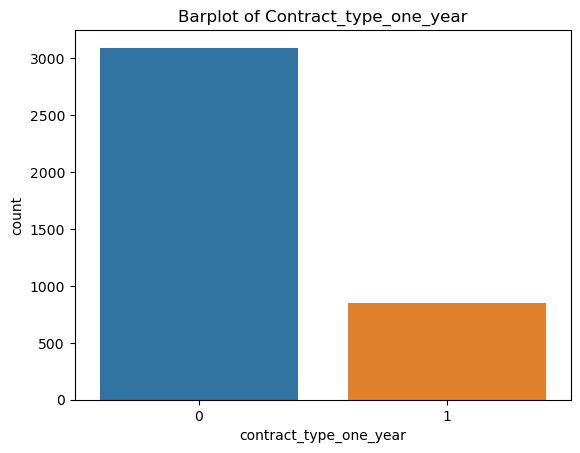

Value Frequency of Contract_type_one_year
   contract_type_one_year  contract_type_one_year
0                    3092                0.784174
1                     851                0.215826


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




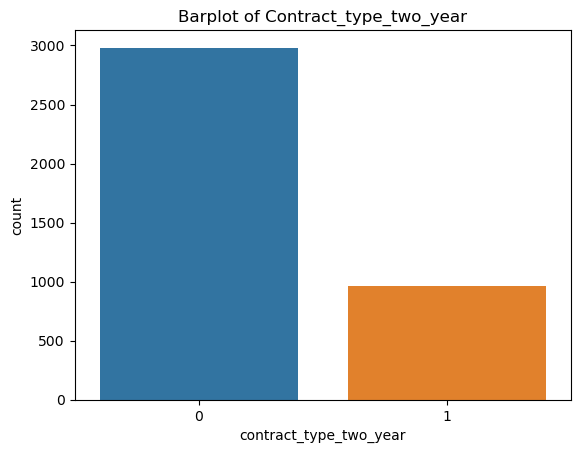

Value Frequency of Contract_type_two_year
   contract_type_two_year  contract_type_two_year
0                    2981                0.756023
1                     962                0.243977


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




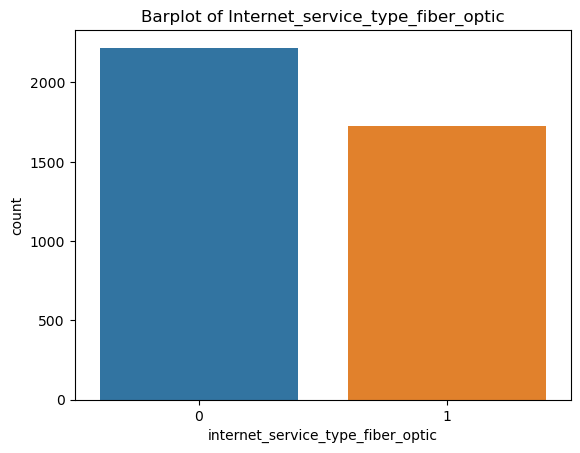

Value Frequency of Internet_service_type_fiber_optic
   internet_service_type_fiber_optic  internet_service_type_fiber_optic
0                               2220                           0.563023
1                               1723                           0.436977


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




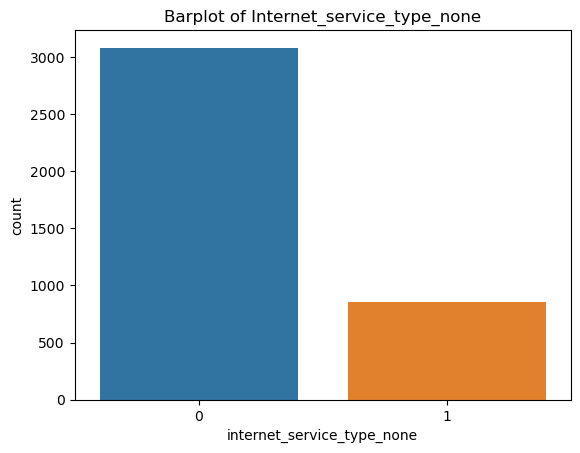

Value Frequency of Internet_service_type_none
   internet_service_type_none  internet_service_type_none
0                        3084                    0.782146
1                         859                    0.217854


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




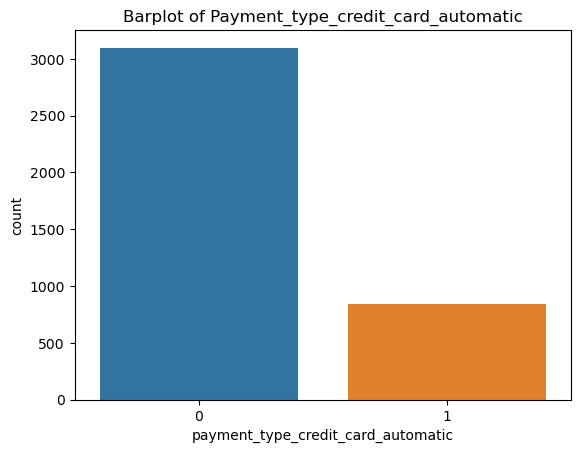

Value Frequency of Payment_type_credit_card_automatic
   payment_type_credit_card_automatic  payment_type_credit_card_automatic
0                                3098                            0.785696
1                                 845                            0.214304


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




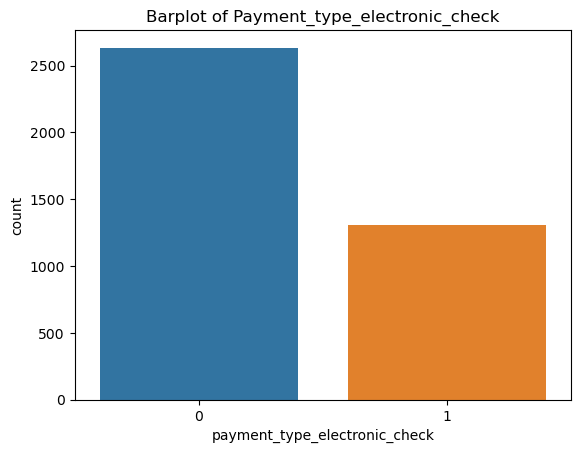

Value Frequency of Payment_type_electronic_check
   payment_type_electronic_check  payment_type_electronic_check
0                           2635                       0.668273
1                           1308                       0.331727


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




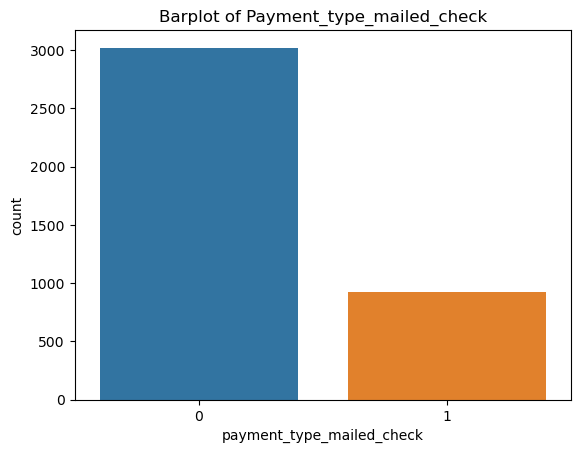

Value Frequency of Payment_type_mailed_check
   payment_type_mailed_check  payment_type_mailed_check
0                       3021                   0.766168
1                        922                   0.233832


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




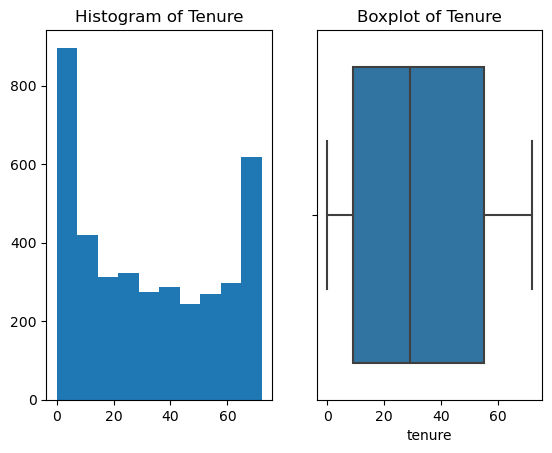

Summary statistics of Tenure:

count    3943.000000
mean       32.492265
std        24.497681
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




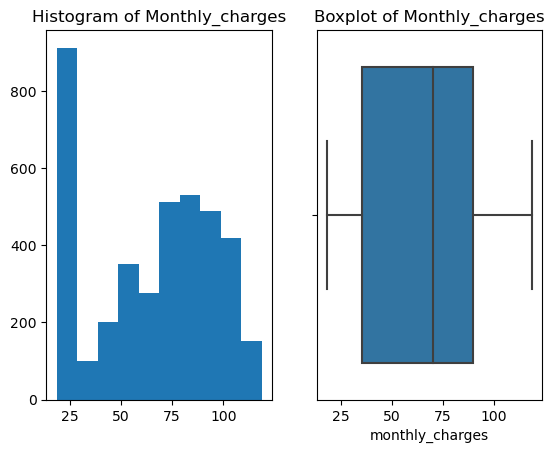

Summary statistics of Monthly_charges:

count    3943.000000
mean       64.515318
std        29.994784
min        18.400000
25%        35.350000
50%        70.150000
75%        89.700000
max       118.750000
Name: monthly_charges, dtype: float64


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




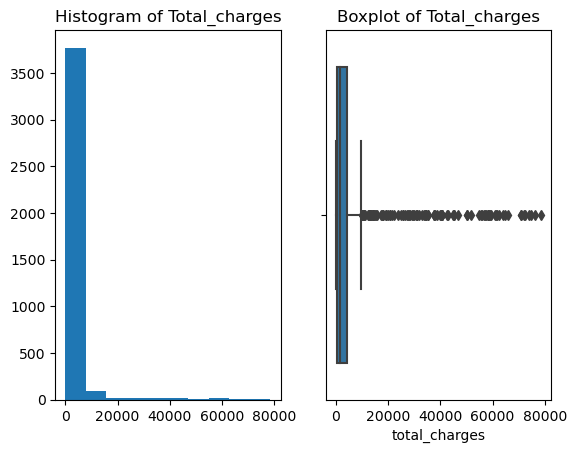

Summary statistics of Total_charges:

count     3943.000000
mean      3201.696640
std       6682.643552
min          0.000000
25%        425.500000
50%       1465.750000
75%       4112.225000
max      78560.000000
Name: total_charges, dtype: float64


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




In [33]:
univariate_stats(train)

>>#### Takeaways:
>>- gender': mostly split evenly
>>- 'senior_citizen': only 16% of customers are senior citizens
    - There may be a relationship between senior citizen and the variety of addons
>>- 'partner': almost evenly split 
>>- 'dependents': 30% of user have dependents, 70% dont
    - dependents may also overlap a lot with the add-ons, i think it may be worth while to explore the relationship between the two
>>- 'tenure': The two largest individual bins are brand new or have been with the company for a while, while the majority of the clients are between 9 and 56 months ****Remember this is tenure, not when they churn****
    - There is a big drop off after the initial sign up
    - I want to explore the realtionship between tenure, contract type, and churn, also looking into the influences on tenure becuase it is directyl related to everythin. What keeps pepole staying? Who are the poeple that are staying? Do they have children? Do they have add ones? are they streaming? What about the people? Is the drop in tenure related to promotions or is it a show of how people churn?
>>- 'phone_service': majority(90%) has phone service
>>- 'multiple_lines': 49% have mulitple, 10% have nophone, 40% has phone service
    - may be useful to segment customers that do not have phone service vs having phone service
>>- 'online_security': only 29% of customers have online sercurity, and almost 50% dont have it. 25% dont have internet
>>- 'online_backup': 34% of people have the onlint back-up, a little more than online security, there may be overlep in these two groups
    - May be useful to ecplore the overlapp between online security and online backup
>>- 'device_protection': 34% of people have device protection as well with roughly even dirtubution of people with these features
    - There seems to be a trend in the stats for these features
>>- 'tech_support': Tech support appears to have a drop down to 28%
>>- 'streaming_tv': this is a larger boost with roughly 38% with tv streaming, its likely that people with dependents, non
>>- 'streaming_movies':
    - it may be useful to combine streaming movies and stresming_tv togethe into one group 'streaming_services' but that will be an extra thing i'll do later
>>- 'paperless_billing': 58% have paperless billing, 42% dont
>>- 'monthly_charges': I'm assuming the addpon (mulitple lines, streaming, protections, etc) are directly related to the charges. 
    - I also think therea will be a relationship to tenure, with the very low costs belonging to the lower tenures. What is more expensive? What costs more and what costs less? Does this impact churn? Can I find out if there is a realtion ship between costs, add-ons, churn, and which are more useful to the consumer?
>>- 'total_charges': The total charges seems wild to me.
    - I'm curious but why are there some clients with expremely high total charges? I think i may need to do some calucations of monhtly charges and tenure to make sure the data is correct. I believe there may be an error in this data with so many outliers present. 
>>- 'churn': 73% of people stay while 27% of people leave/churn
>>- 'contract_type': 54% have month to month, one 25% have 2 year contracts, and 21% percent have one year contracts
>>- 'internet_service_type': 22.5% dont have internet, 34.1% have dsl, 43.4% have fiber
>>- 'payment_type': 33.4% have electronic checks with all others arounf 22%

>>#### Actions
>>- none of the num variables are normally distributed
>>- down the line: change all the values in the table to pyhton formatted strings

>### Bivariate analysis questions:

In [34]:
def bivariate_stats(train):
    '''
    
    '''
    explore_col, cat_col, num_col = determine_variable_type(train)
    
    target = 'churn'
    for col in cat_col:
        if col != target:
            sns.barplot(data=train,
                        x=col, 
                        y=target)
            plt.axhline(train[target].mean(), c='r')
            plt.title(f'{target.capitalize()} by {col.capitalize()} Barplot')
            plt.show()
    
    for col in num_col:
        if col != target:
            plt.subplot(121)
            sns.barplot(data=train,
                       x=target,
                       y=col)
            plt.axhline(train[col].mean(), c='r')
            
            plt.subplot(122)
            sns.boxplot(data=train,
                       x=target,
                       y=col)
            plt.axhline(train[col].mean(), c='r')
            plt.show()
            
    return

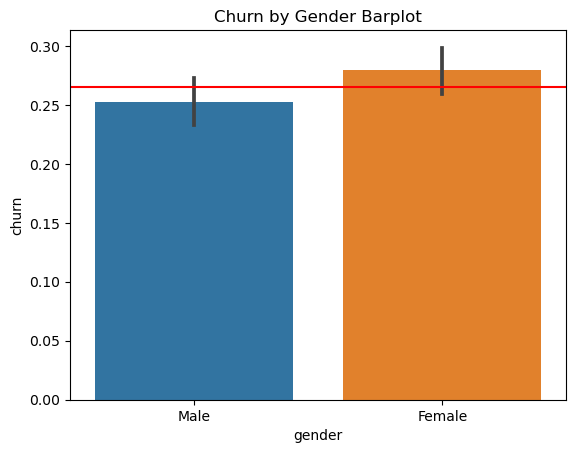

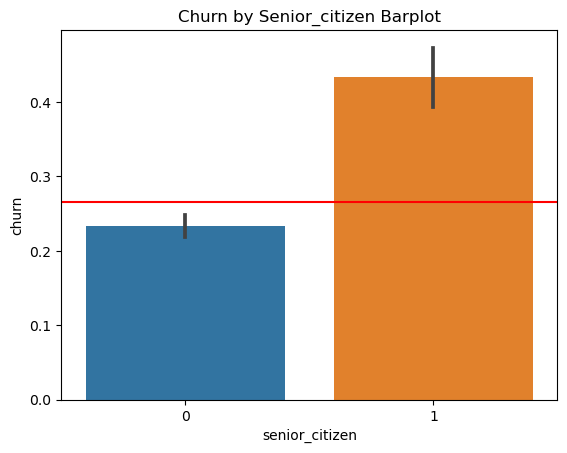

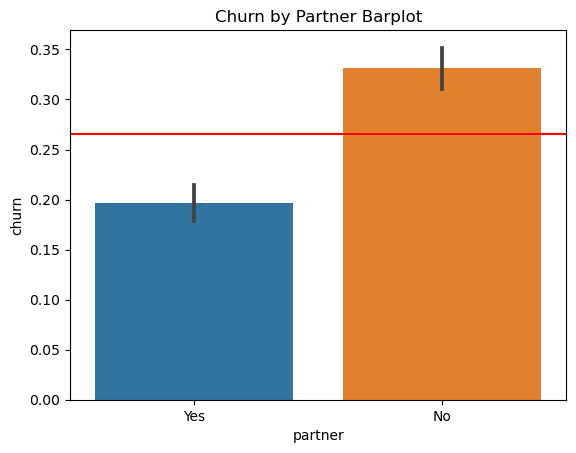

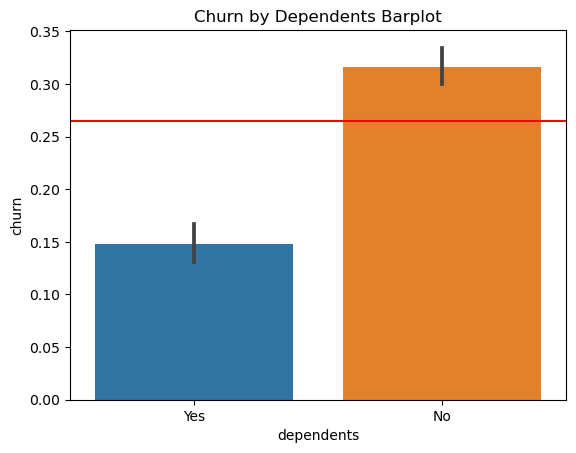

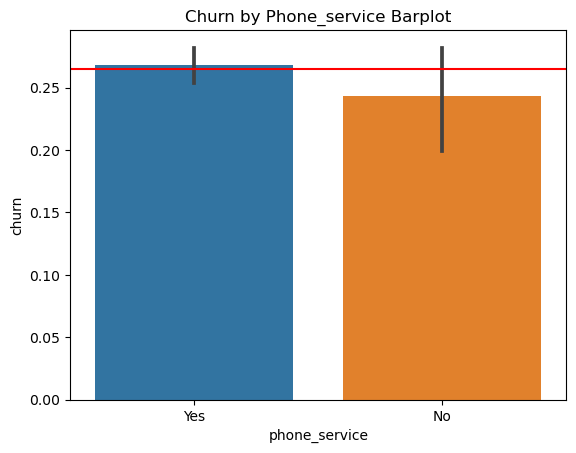

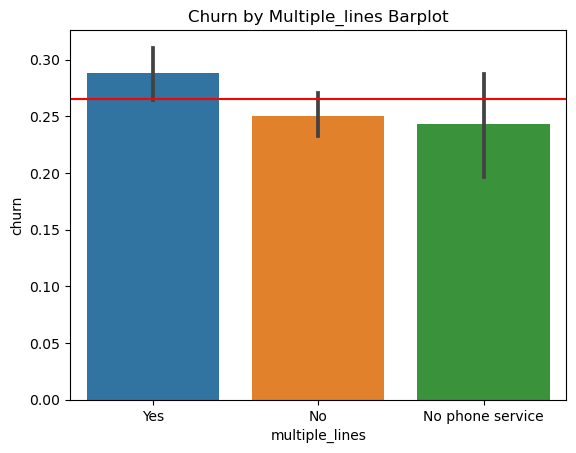

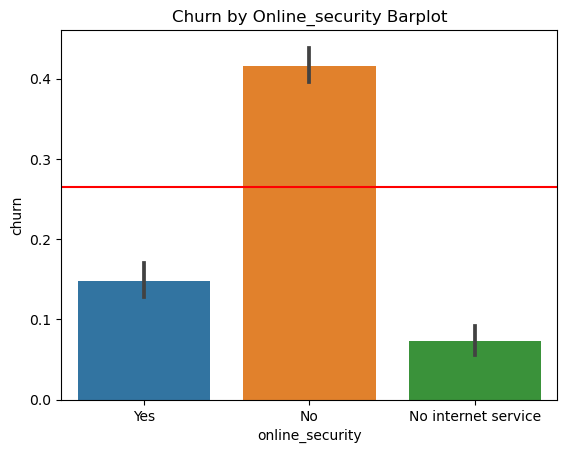

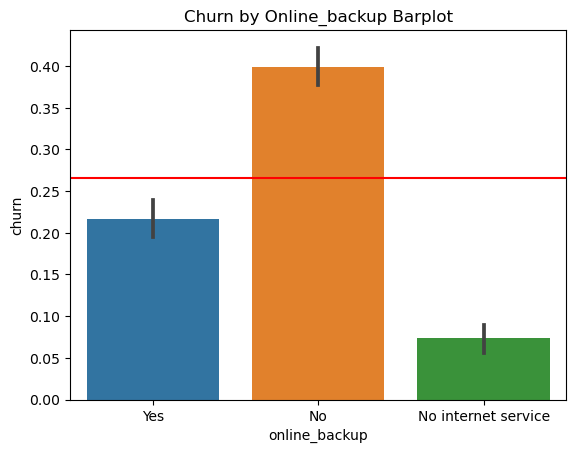

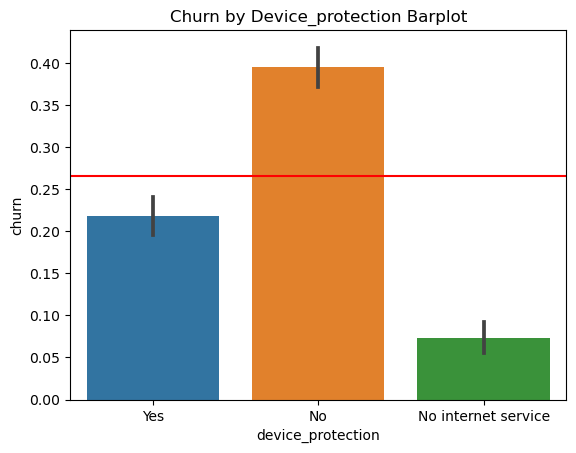

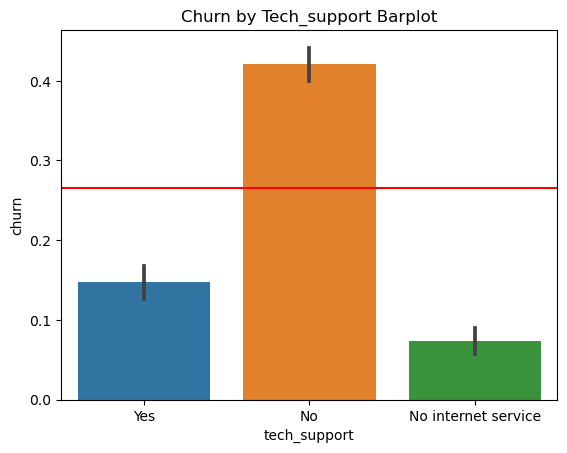

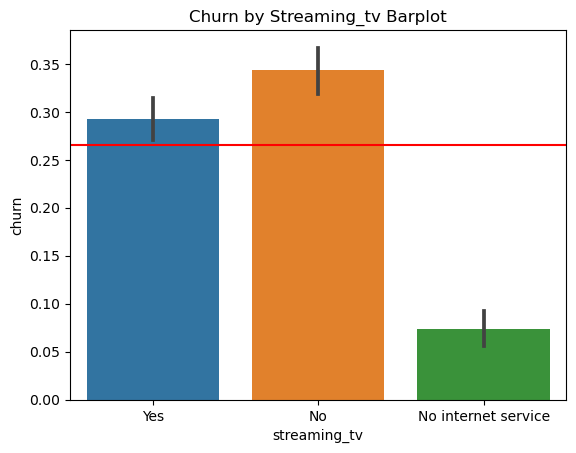

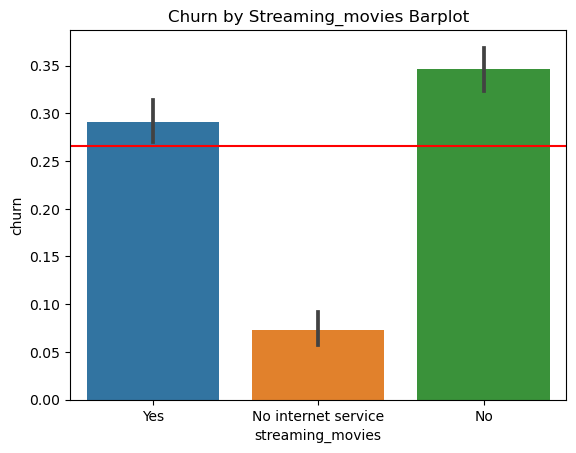

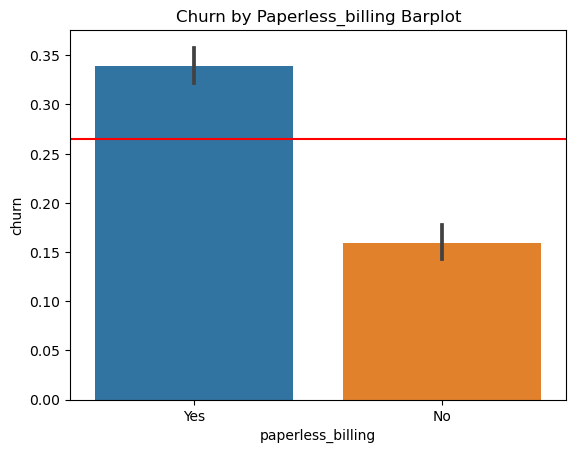

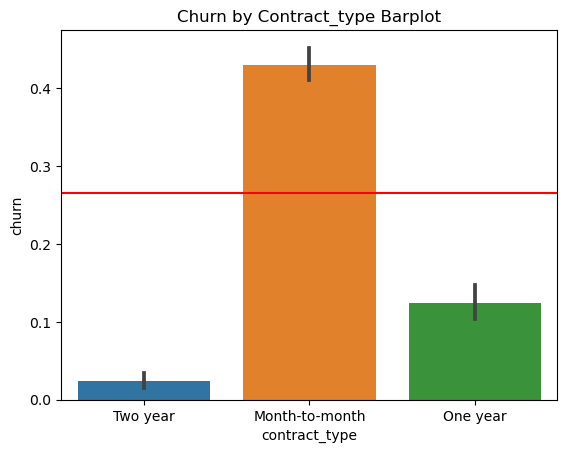

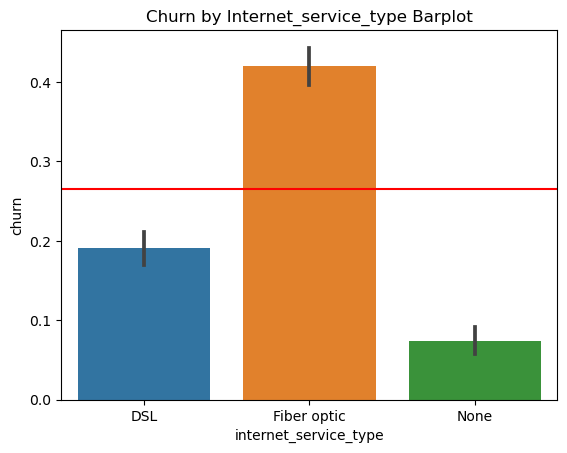

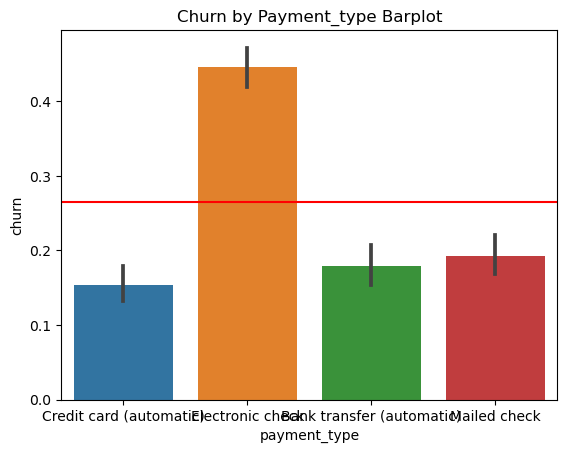

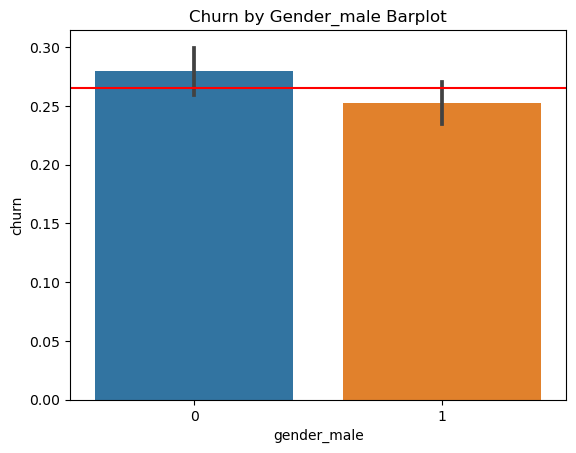

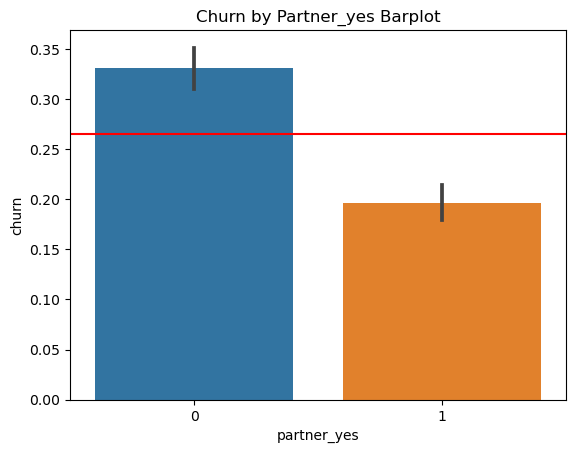

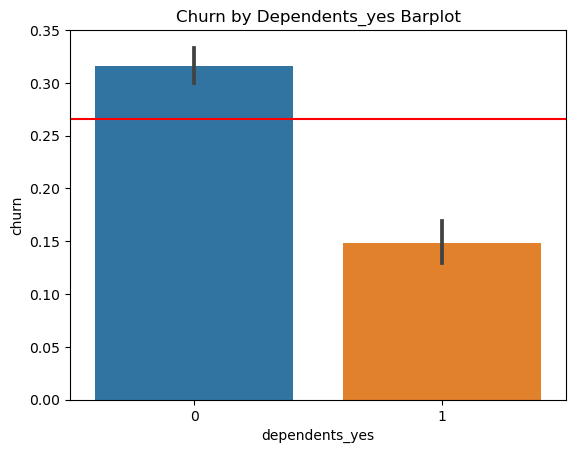

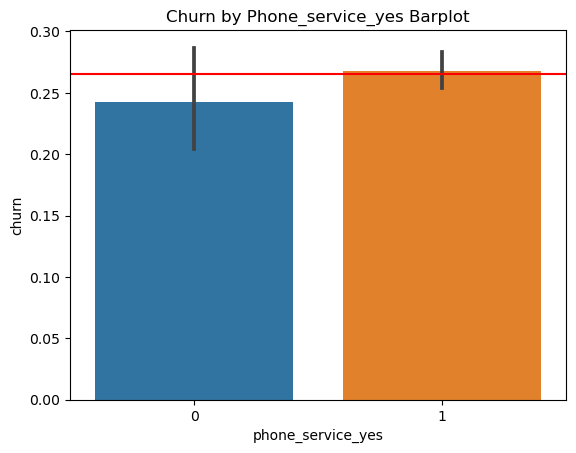

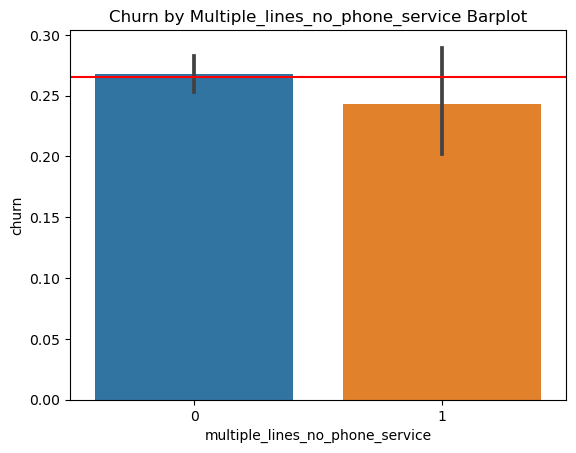

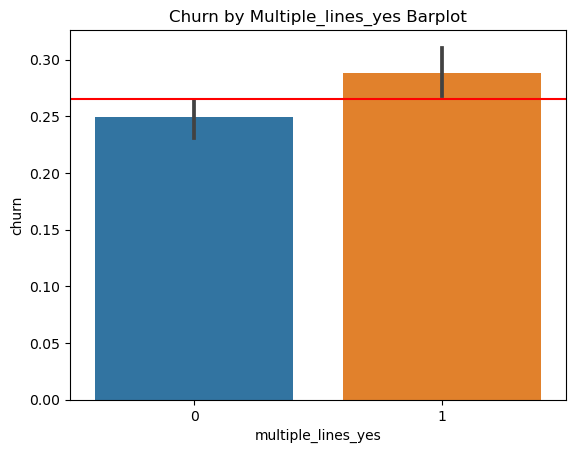

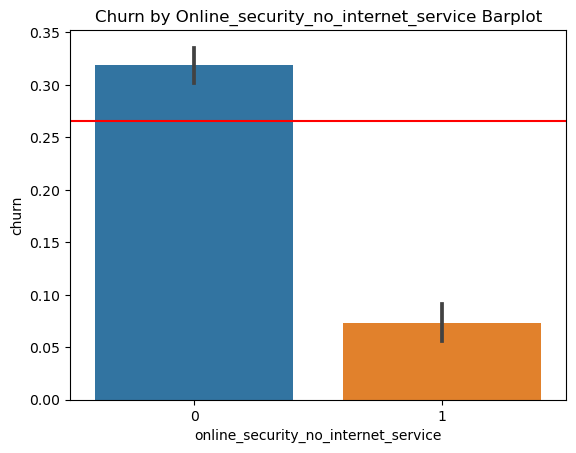

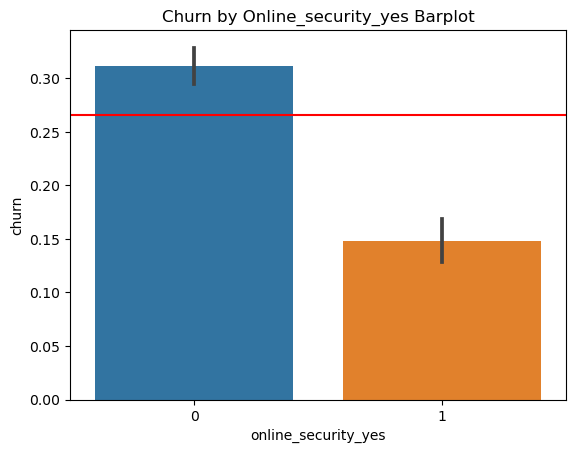

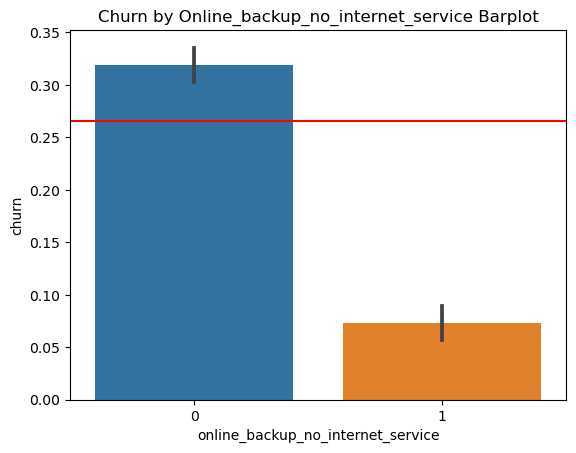

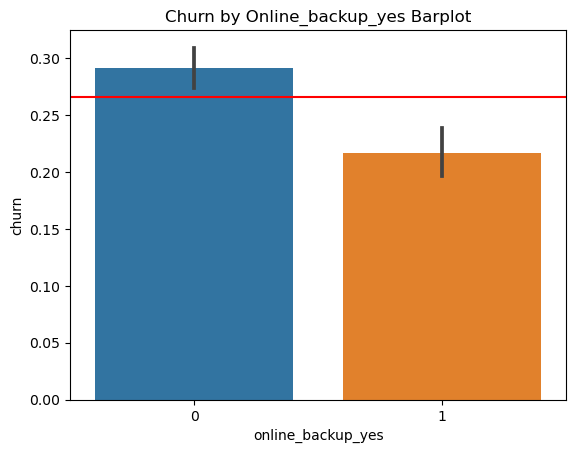

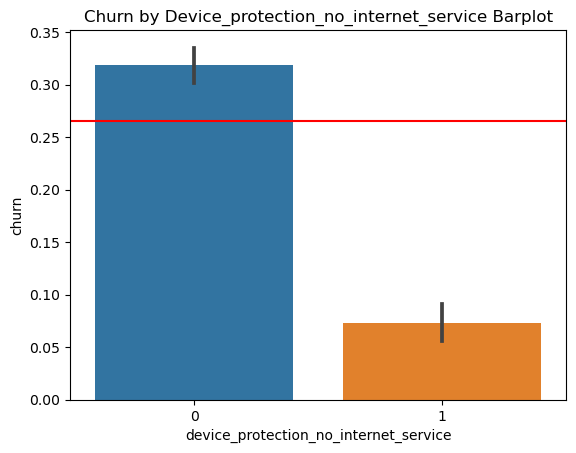

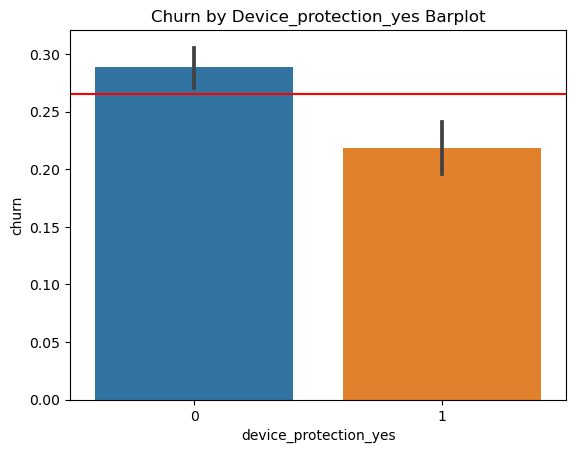

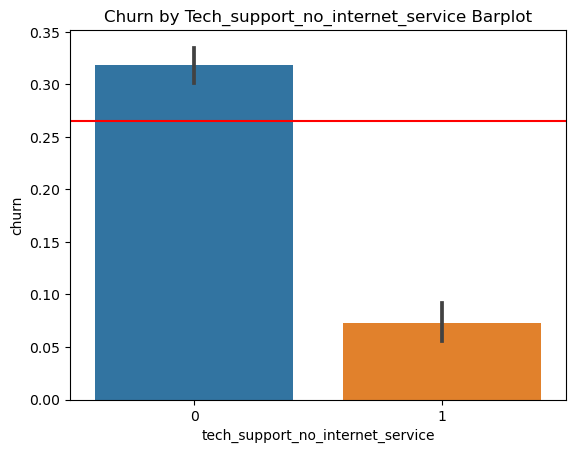

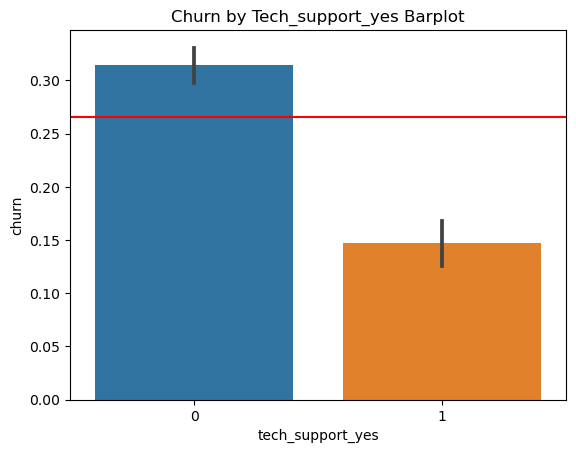

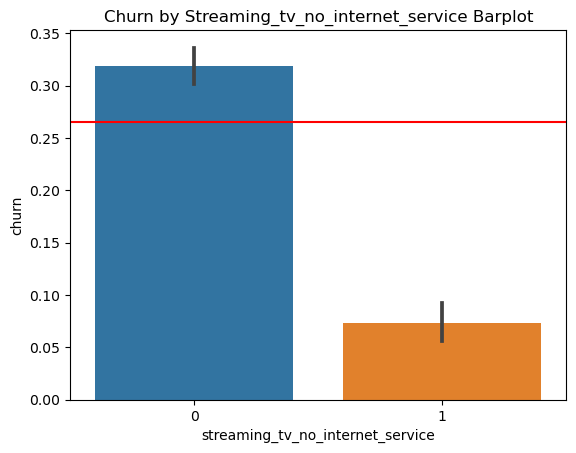

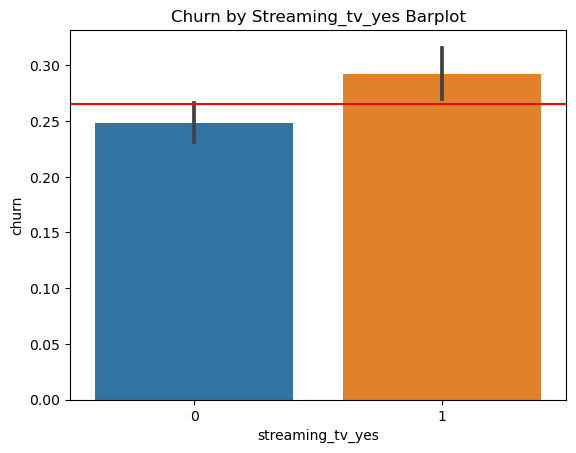

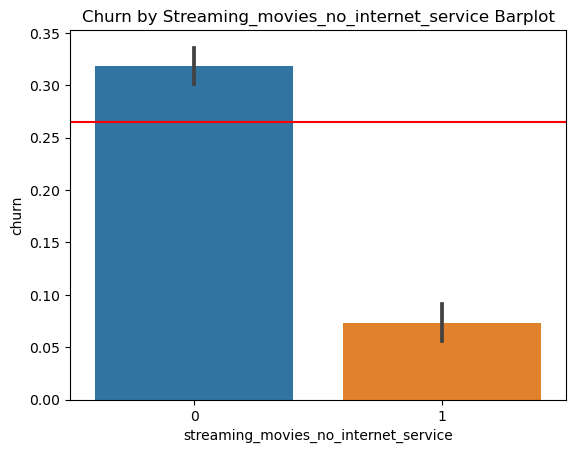

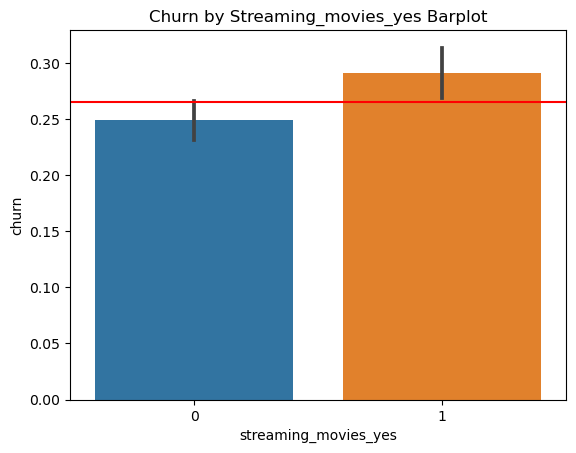

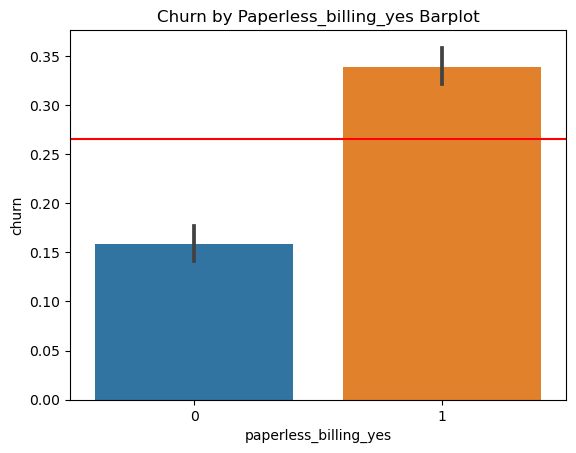

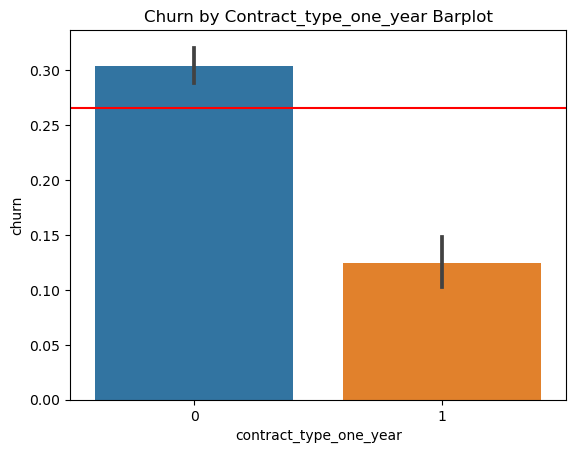

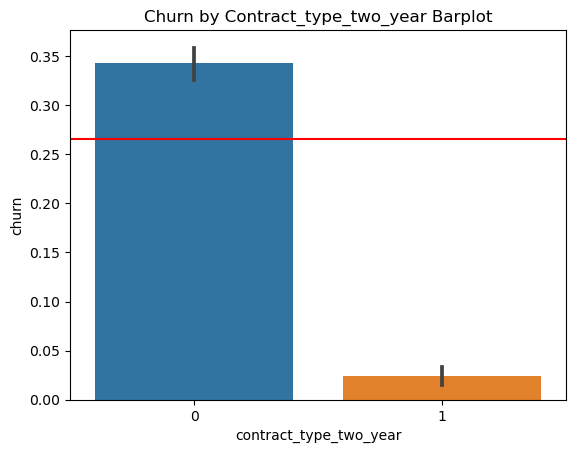

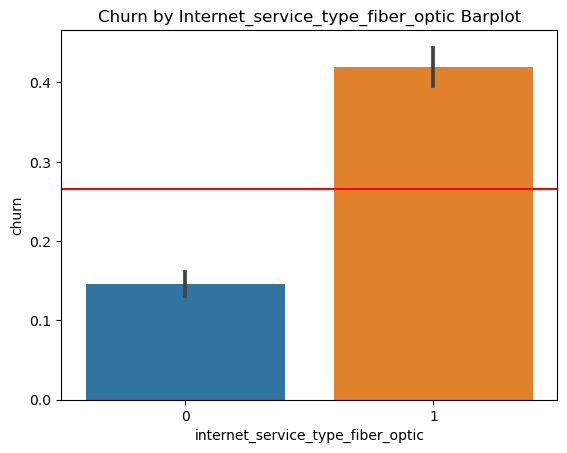

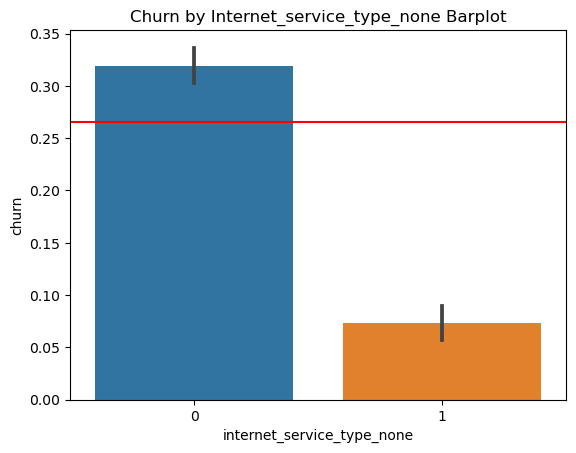

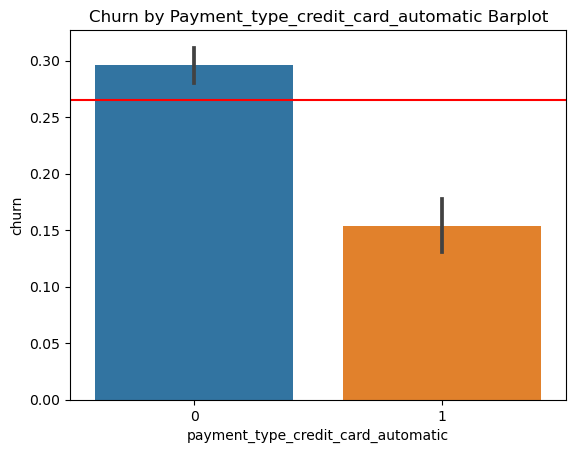

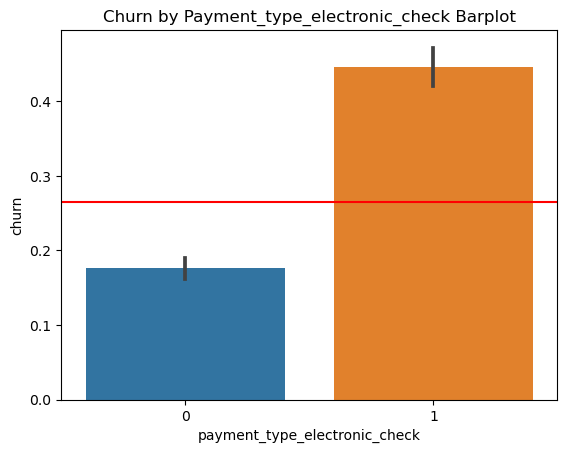

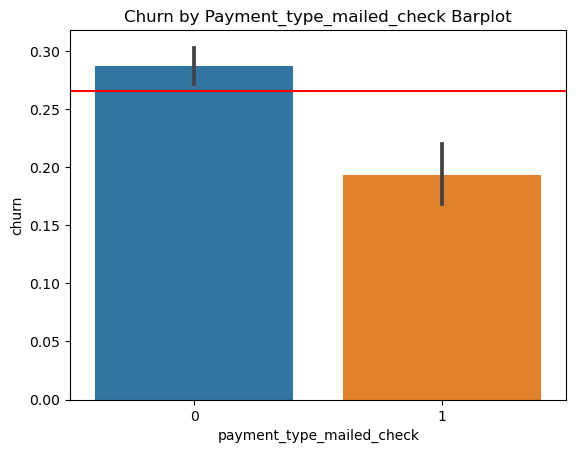

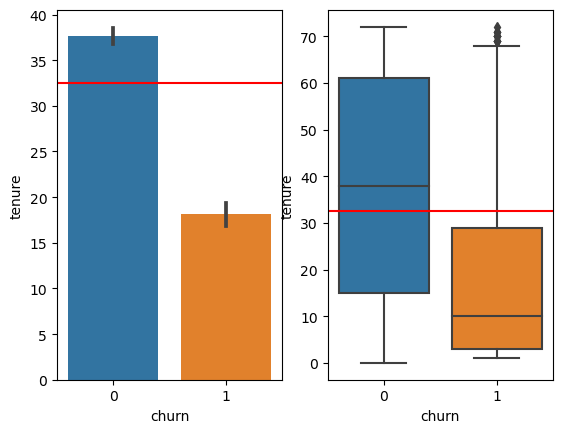

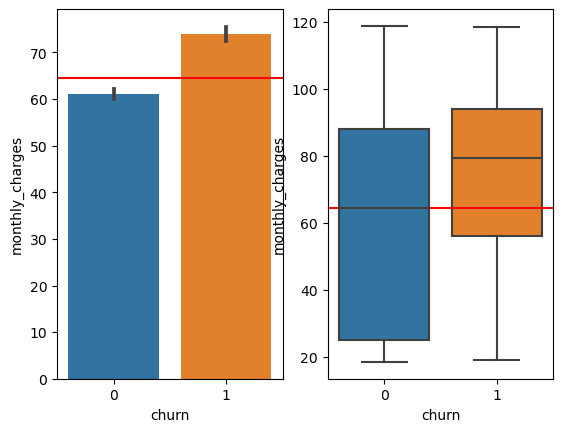

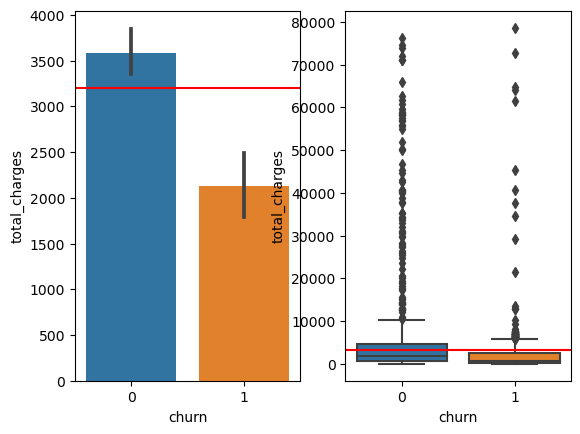

In [35]:
bivariate_stats(train)

>>>- Is there a relationship between churn and:
    - 'gender': very small, no
    - **'senior_citizen'**: yes, older people churn at a higher proportion
    - **'partner'**: single people churn more than partnered people
    - **'dependents'**: people w/o dependents churn more than people with dependents
    - **'tenure'**: 
        - people with higher tenure are leaving
    - 'phone_service',
    - 'multiple_lines',
    - ***Suspected Subset***
        - **'online_security'**:
            - people without internet churn less
            - people without online security churn less
        - '**online_backup'**:
            - people without backup churn at more
        - **'device_protection'**,
        - '**tech_support'**,
    - ***Suspected Subset***
        - **'streaming_tv'**,
        - **'streaming_movies'**,
    - ***Potential Subset/Relationship***
        - **'paperless_billing'**: I think this is related to having internet
        - **'payment_type**:
            - paperless billing is 
    - **'monthly_charges'**: people payonig over the average monhtly charge amount are churnning more
    - 'total_charges',
    - 'churn',
    - **'contract_type'**
        - month to month has a higher churn rate
    - **'internet_service_type'**,
        - fiber optic churns at a high rate
        
 >>> Actions: Loonk into the potential subsets, if they're the same people, create a new column that shows that

In [36]:
# checking for similarities in these 
(train['streaming_tv'] == train['streaming_movies']).value_counts()

# over 20% are not the same, will not bin these together
3069 / (3069 + 874)

0.7783413644433173

In [37]:
(train['online_backup'] == train['online_security']).value_counts()
(train['online_backup'] == train['device_protection']).value_counts()

True     2689
False    1254
dtype: int64

> ### Hypothesis Testing Variables of Interest

In [38]:
from scipy  import stats

> Variables:Tenure
>>#### H$_0$: tenure of people who churn >= monthly charges of peopl
>>#### H$_a$: tenure of people who churn < monthly charges of peopl
>>#### Sample: 2 sample
>>#### Tails/Directionality: 1 tailed
>>#### Normality: no
>>#### Test: 

> Variables: Monthly Charges
>>#### H$_0$: monthly charges of people who churn =< monthly charges of customers who dont churn
>>#### H$_a$:monthly charges of people who churn > monthly charges of customers who dont churn
>>#### Sample: 2 sample
>>#### Tails/Directionality: 1 tailed
>>#### Test: 

In [39]:
# creating list of columns of interst based on whether they are cat or num
interest_cat = ['senior_citizen', 
                    'partner',
                    'dependents',
                    'online_security',
                    'online_backup',
                    'device_protection',
                    'tech_support',
                    'streaming_tv',
                    'streaming_movies',
                    'paperless_billing',
                    'contract_type',
                    'internet_service_type',
                    'payment_type']


interest_num = ['tenure', 'monthly_charges']

interest_col = ['churn'] + interest_cat + interest_num

In [40]:
# Creating a function display the resukts of the $x^2$ test
def chi_squared_telco(train, ls):
    '''
    Action:
    
    Modules: scipy.stats
    '''
    target = 'churn'
    α = 0.05
    dependent_cols = []
    for col in ls:
        print(f'\n\nVariable of Interest: {col.upper()}')
        print(f'''\033[1mNull Hypothesis:\033[0m This is no relationship between {target} and {col}.\n\033[1mAlternative Hypothesis:\033[0m There is some relationship between {target} and {col}.''')
        observed = pd.crosstab(train[target], train[col])
        chi2, p, degf, expected = stats.chi2_contingency(observed)
        if p < α:
            print(f'There exists some relationship between {target} and the {col}. \nWe \033[1mreject\033[0m the null hypothesis. (p-value: {p})')
            dependent_cols.append(col)
        else:
            print(f'There is not a significant relationship between {target} and {col}. \nWe \033[1mcannot reject\033[0m the Null Hypothesis. (p-value: {p})')
    return dependent_cols

In [41]:
target = 'churn'
α = 0.05
dependent_cols = []
for col in interest_cat:
    print(f'\n\nVariable of Interest: {col.upper()}')
    print(f'''\033[1mNull Hypothesis:\033[0m This is no relationship between {target} and {col}.\n\033[1mAlternative Hypothesis:\033[0m There is some relationship between {target} and {col}.
''')
    observed = pd.crosstab(train[target], train[col])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    
    if p < α:
        print(f'There exists some relationship between {target} and the {col}. \nWe \033[1mreject\033[0m the null hypothesis. (p-value: {p})')
        dependent_cols.append(col)
    else:
        print(f'There is not a significant relationship between {target} and {col}. \nWe \033[1mcannot reject\033[0m the Null Hypothesis. (p-value: {p})')



Variable of Interest: SENIOR_CITIZEN
Null Hypothesis: This is no relationship between churn and senior_citizen.
Alternative Hypothesis: There is some relationship between churn and senior_citizen.

There exists some relationship between churn and the senior_citizen. 
We reject the null hypothesis. (p-value: 8.161737559916497e-26)


Variable of Interest: PARTNER
Null Hypothesis: This is no relationship between churn and partner.
Alternative Hypothesis: There is some relationship between churn and partner.

There exists some relationship between churn and the partner. 
We reject the null hypothesis. (p-value: 1.0121113976776871e-21)


Variable of Interest: DEPENDENTS
Null Hypothesis: This is no relationship between churn and dependents.
Alternative Hypothesis: There is some relationship between churn and dependents.

There exists some relationship between churn and the dependents. 
We reject the null hypothesis. (p-value: 6.647279459430682e-28)


Variable of Interest: ONLINE_SECURITY
N

### Preprocessing

In [42]:
### ACTION: FOR PREPROCESSING GO BACK AND TRIM THE DF IN THE PREP DOCUMENT

### Model

> Decision Tree
>- Because we are looking at churn, incorrectly identifying non-churn results in unexpected loss. The number we want to be highest is the false negative rate
>- In the case of false positives, it may result in pushing extra discounts to the oerson we predict to churn, but this may boost the customers loyalty to our company. We still want a relatively low false positive rate

In [43]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [44]:
X_train = pd.get_dummies(train[dependent_cols], drop_first=True)
y_train = train.churn

X_val = pd.get_dummies(validate[dependent_cols], drop_first=True)
y_val = validate.churn

X_test = pd.get_dummies(test[dependent_cols], drop_first=True)
y_test = test.churn

In [45]:
# make it
clf = DecisionTreeClassifier()

# fit it
clf.fit(X_train, y_train)

# prediction
y_preds = clf.predict(X_train)

In [46]:
# Evaluate it
print(classification_report(y_train, y_preds))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2897
           1       0.84      0.75      0.79      1046

    accuracy                           0.90      3943
   macro avg       0.88      0.85      0.86      3943
weighted avg       0.89      0.90      0.89      3943



In [47]:
one_start = [i for i in range(1,11)]
ten_start =  [i for i in range(1,11)]
ten_start.reverse()
model_dict = {}

for o in one_start:
    for t in one_start:
        # initial model with min samp of 01 and max depth of 10
        clf = DecisionTreeClassifier(min_samples_leaf=o, max_depth=t)
        # fitting the model to the training ds
        clf.fit(X_train, y_train)
        # storing predicted values to the variable
        clf_preds = clf.predict(X_train) 
        clf_val_preds = clf.predict(X_val) 
        
        clf_confusion = confusion_matrix(y_train, clf_preds)
        tp_clf = clf_confusion[1,1]
        tn_clf = clf_confusion[0,0]
        fp_clf = clf_confusion[0,1]
        fn_clf = clf_confusion[1,0]
        
        
        accuracy = round((tp_clf + tn_clf) / (tp_clf+ tn_clf + fp_clf + fn_clf), 4)
        true_postive_rate = round(tp_clf / (tp_clf + fn_clf), 4)
        false_positive_rate = round(fp_clf / (tn_clf + fp_clf), 4)
        true_negative_rate = round((tn_clf) / (tn_clf + fp_clf), 4)
        false_negative_rate = round((fn_clf) / (tp_clf + fn_clf), 4)
        clf_precision = round((tp_clf) / (tp_clf + fp_clf), 4)
        clf_recall = round((tp_clf) / (tp_clf + fn_clf), 4)
        f1 = round(2 * (clf_precision * clf_recall) / (clf_precision + clf_recall), 4)
        
        model_dict[f'rf_samp{o}_max{t}'] = {}
        model_dict[f'rf_samp{o}_max{t}']['model'] = clf
        model_dict[f'rf_samp{o}_max{t}']['train_score'] = clf.score(X_train, y_train)
        model_dict[f'rf_samp{o}_max{t}']['val_score'] = clf.score(X_val, y_val)
        model_dict[f'rf_samp{o}_max{t}']['train_val_score_difference'] = clf.score(X_train, y_train) - clf.score(X_val, y_val)
        
        if false_negative_rate < .25:
            print(f'''

            Model: CLF {o}|{t}
            Accuracy: {accuracy:.2%}
            False Positive Rate: {false_positive_rate:.2%}
            True Negative Rate: {true_negative_rate:.2%}
            False Negative Rate: {false_negative_rate:.2%}
            F1: {f1:.2%}
            Validation Set Classification Report:

            {classification_report(y_val, clf_val_preds)}
            ''')

/var/folders/fj/7fbysvvn7956npcj9d4mxfxw0000gn/T/ipykernel_57415/2739490884.py:28: RuntimeWarning: invalid value encountered in long_scalars
  clf_precision = round((tp_clf) / (tp_clf + fp_clf), 4)
/var/folders/fj/7fbysvvn7956npcj9d4mxfxw0000gn/T/ipykernel_57415/2739490884.py:28: RuntimeWarning: invalid value encountered in long_scalars
  clf_precision = round((tp_clf) / (tp_clf + fp_clf), 4)
/var/folders/fj/7fbysvvn7956npcj9d4mxfxw0000gn/T/ipykernel_57415/2739490884.py:28: RuntimeWarning: invalid value encountered in long_scalars
  clf_precision = round((tp_clf) / (tp_clf + fp_clf), 4)
/var/folders/fj/7fbysvvn7956npcj9d4mxfxw0000gn/T/ipykernel_57415/2739490884.py:28: RuntimeWarning: invalid value encountered in long_scalars
  clf_precision = round((tp_clf) / (tp_clf + fp_clf), 4)
/var/folders/fj/7fbysvvn7956npcj9d4mxfxw0000gn/T/ipykernel_57415/2739490884.py:28: RuntimeWarning: invalid value encountered in long_scalars
  clf_precision = round((tp_clf) / (tp_clf + fp_clf), 4)
/var/folde

> Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [95]:
one_start = [i for i in range(1,20)]
ten_start =  [i for i in range(1,11)]
ten_start.reverse()
model_dict = {}

# for o in ten_start:
for t in one_start:
    # initial model with min samp of 01 and max depth of 10
    clf = RandomForestClassifier(#min_samples_leaf=o,
                                 max_depth=t)
    # fitting the model to the training ds
    clf.fit(X_train, y_train)
    # storing predicted values to the variable
    clf_preds = clf.predict(X_train) 
    clf_val_preds = clf.predict(X_val) 

    clf_confusion = confusion_matrix(y_train, clf_preds)
    tp_clf = clf_confusion[1,1].astype(float)
    tn_clf = clf_confusion[0,0].astype(float)
    fp_clf = clf_confusion[0,1].astype(float)
    fn_clf = clf_confusion[1,0].astype(float)


    accuracy = round((tp_clf + tn_clf) / (tp_clf+ tn_clf + fp_clf + fn_clf), 4)
    true_postive_rate = round(tp_clf / (tp_clf + fn_clf), 4)
    false_positive_rate = round(fp_clf / (tn_clf + fp_clf), 4)
    true_negative_rate = round((tn_clf) / (tn_clf + fp_clf), 4)
    false_negative_rate = round((fn_clf) / (tp_clf + fn_clf), 4)
    clf_precision = round((tp_clf) / (tp_clf + fp_clf), 4)
    clf_recall = round((tp_clf) / (tp_clf + fn_clf), 4)
    f1 = round(2 * (clf_precision * clf_recall) / (clf_precision + clf_recall), 4)

    model_dict[f'rf_samp{o}_max{t}'] = {}
    model_dict[f'rf_samp{o}_max{t}']['model'] = clf
    model_dict[f'rf_samp{o}_max{t}']['train_score'] = clf.score(X_train, y_train)
    model_dict[f'rf_samp{o}_max{t}']['val_score'] = clf.score(X_val, y_val)
    model_dict[f'rf_samp{o}_max{t}']['train_val_score_difference'] = clf.score(X_train, y_train) - clf.score(X_val, y_val)

    if false_negative_rate < .45:
        print(f'''

        Model: CLF {o}|{t}
        Accuracy: {accuracy:.2%}
        False Positive Rate: {false_positive_rate:.2%}
        True Negative Rate: {true_negative_rate:.2%}
        False Negative Rate: {false_negative_rate:.2%}
        F1: {f1:.2%}
        Validation Set Classification Report:

        {classification_report(y_val, clf_val_preds)}
        ''')



        Model: CLF 1|10
        Accuracy: 83.19%
        False Positive Rate: 8.32%
        True Negative Rate: 91.68%
        False Negative Rate: 40.34%
        F1: 65.31%
        Validation Set Classification Report:

                      precision    recall  f1-score   support

           0       0.82      0.89      0.85      1242
           1       0.60      0.44      0.51       449

    accuracy                           0.77      1691
   macro avg       0.71      0.67      0.68      1691
weighted avg       0.76      0.77      0.76      1691

        


        Model: CLF 1|11
        Accuracy: 85.72%
        False Positive Rate: 8.56%
        True Negative Rate: 91.44%
        False Negative Rate: 30.11%
        F1: 72.20%
        Validation Set Classification Report:

                      precision    recall  f1-score   support

           0       0.82      0.88      0.85      1242
           1       0.58      0.48      0.53       449

    accuracy                          

In [98]:
model_dict['rf_samp1_max1']['train_val_score_difference']

0.11202554797346509

>> Takeaways:
>>- Max depth of 14 is a good random forest

> KNN

In [82]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsClassifier

In [92]:
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_preds = knn.predict(X_train)
    tn, fn, fp, tp = confusion_matrix(y_train, y_preds).ravel()
    pd.crosstab(y_train, y_preds)
    fn_rate = fn / (fn + tp)
    score = knn.score(X_train, y_train)
    if fn_rate < .30:
        print(i, fn_rate, score)


1 0.21465428276573786 0.8749682982500634
2 0.15247524752475247 0.8237382703525234
3 0.29968782518210196 0.8323611463352777
4 0.2708638360175695 0.8141009383717981
6 0.2781740370898716 0.8135937103728126


In [93]:
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_val, y_val)
    yval_preds = knn.predict(X_val)
    tn, fn, fp, tp = confusion_matrix(y_val, yval_preds).ravel()
    pd.crosstab(y_val, yval_preds)
    fn_rate = fn / (fn + tp)
    score = knn.score(X_val, y_val)
    if fn_rate < .30:
        print(i, fn_rate, score)


1 0.18318965517241378 0.9083382613837966
2 0.12062256809338522 0.8497930218805441
3 0.2950108459869848 0.8462448255470136
4 0.20284697508896798 0.8332347723240686
6 0.2848297213622291 0.8166765227675932


>> Takeaways:
>>- Best neighbors == 1, 2

> Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression
import itertools

In [119]:
logit = LogisticRegression()

logit.fit(X_train, y_train)

y_preds = logit.predict(X_train)

In [121]:
print(classification_report(y_train, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      2897
           1       0.61      0.51      0.55      1046

    accuracy                           0.78      3943
   macro avg       0.72      0.70      0.71      3943
weighted avg       0.77      0.78      0.78      3943



### Evaluate

### Readme